<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1 style="font-size: 30px;">Methoden der Datenanalyse Projektbericht</h1>
</div>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2>Datensammlung</h2>
</div>
</div>


In [1]:
import requests
import bs4
import pandas as pd

In [2]:
def scrape_listings(url):
    # Open the URL
    r = requests.get(url)
    # Parse the HTML
    soup = bs4.BeautifulSoup(r.text, 'html.parser')

    # Find all td-elements with class "horizontal-half-padder-minus pr"
    listings = soup.find_all('td', {'horizontal-half-padder-minus pr'})
    # Iterate over the listings
    rows = []
    for element in listings:
        row = {}
        # Find the a-element in element
        row['url'] = "https://www.arabam.com/" + element.find('a').get('href')
        rows.append(row)
    return pd.DataFrame(rows)

Dies kann verwendet werden, um Auflistungs-URLs von Autos auf der Webseite „www.arabam.com“ zu extrahieren. Es nutzt die Bibliotheken Pandas, Requests und BeautifulSoup aus bs4 (BeautifulSoup4). Die Funktion akzeptiert eine URL als Eingabe, lädt den Inhalt der Seite, analysiert das HTML, sucht nach bestimmten -Elementen mit einer spezifischen Klasse und wechselt dann die URLs von Listings aus den „a“ Elementen in einem Data Frame, bevor es diesen DataFrame zurückgibt .

In [3]:
df = scrape_listings("https://www.arabam.com/ikinci-el/otomobil/skoda?take=50")
df.head()

,url
0,https://www.arabam.com//ilan/galeriden-satilik...
1,https://www.arabam.com//ilan/galeriden-satilik...
2,https://www.arabam.com//ilan/galeriden-satilik...
3,https://www.arabam.com//ilan/galeriden-satilik...
4,https://www.arabam.com//ilan/galeriden-satilik...


Das der Variablen df zugewiesene Ergebnis stellt einen Pandas DataFrame dar, der die URLs dieser Autoanzeigen enthält. Wenn wir hier die df-Variable drucken, sehen wir eine Tabelle mit den URLs der relevanten Anzeigen.

In [ ]:
def scrape_details(df):
    # Iterate over the rows of df
    for i in range(len(df)):
        # Open the URL
        r = requests.get(df['url'].iloc[i])
        # Parse the HTML
        soup = bs4.BeautifulSoup(r.text, 'html.parser')
        # Find the div-element with class 'product-properties' in soup
        pricing = soup.find('div', {'class': 'product-properties'})
        # Find all sd-cell-row-elements in pricing
        for cell in pricing.find_all('div', {'class': 'property-item'}):
            # Find all sd-cell-col-elements in cell
            cols = cell.find('div', {'class': 'property-key'})
            rows = cell.find_all('div', {'class': 'property-value'})
            # Add a new column to the df if not existing and set the i-th value for the column
            if cols and cols.text.strip() not in df.columns:
                df[cols.text.strip()] = None


            if rows and cols:
                    df.loc[i, cols.text.strip()] = rows[0].text.strip() if rows else None
        for cell in pricing.find_all('div', {'class': 'product-properties--sticky'}):
            for cell2 in cell.find_all('div', {'class': 'product-price-container'}):

                cols = cell2.find('div', {'class': 'property-key'})
                rows = cell2.find_all('div', {'class': 'product-price'})
                # Add a new column to the df if not existing and set the i-th value for the column
                if cols and cols.text.strip() not in df.columns:
                    df[cols.text.strip()] = None


                if rows and cols:
                        df.loc[i, cols.text.strip()] = rows[0].text.strip() if rows else None

    return df.drop(["İlan No", "Kimden", "url", "İlan Tarihi", "Takasa Uygun"], axis=1)

#"İlan No" : „Anzeigennummer“
#"Kimden" : „Zu verkaufen von“
#"url" : „URL“
#"İlan Tarihi" : „Anzeigendatum“
#"Takasa Uygun" : „Für den Handel verfügbar“

Diese Funktion macht folgendes:
Öffnet die URL in der Spalte „URL“ des Datenrahmens für jede Zeile und verwendet den von der Funktion „scrape_listings“ erstellten Datenrahmen, um die Auflistungsdetails abzurufen.
Analysiert das HTML der Website mit BeautifulSoup, um bestimmte Elemente zu finden.
Extrahiert Informationen aus diesen Elementen, insbesondere aus div-Tags mit verschiedenen Klassen wie 'product-properties', 'property-item', 'product-properties--sticky' usw.
Fügt die extrahierten Informationen als neue Spalten dem Data Frame hinzu.
Entfernt bestimmte Spalten wie "İlan No": „Anzeigennummer“ , "Kimden": „Zu verkaufen von“, "url", "İlan Tarihi": „Anzeigendatum“ und "Takasa Uygun": „Für den Handel verfügbar“ aus dem DataFrame.
Gibt den bearbeiteten DataFrame zurück, der nun die erfassten Informationen der Webseite in strukturierter Form enthält.


<img src="https://drive.google.com/uc?export=view&id=1-gv_NoEXVJjnoXk8AJVWxOafo06ceSyK" />

So behandeln wir eine einzelne Eigenschaft des Autos mit der div „property-item“.

<img src="https://drive.google.com/uc?export=view&id=10YT2AggVtx96XXXeSjCYc9H5d7BNdN-N" />

Wenn wir diesen Abschnitt öffnen, sehen wir das Div, in dem ein „property-Item“, also eine Eigenschaft des Fahrzeugs, ein „key“ ist und diese keys „value“ sind.

<img src="https://drive.google.com/uc?export=view&id=1jyoV_02VJvaxzSKUksbInm6aFAkLJ8WM" />


Da die Preise des Fahrzeugs nicht in „property-item“, sondern in einem anderen div angegeben sind, ziehen wir die Preise des Fahrzeugs aus diesem im Bild gezeigten Pfad.

<img src="https://drive.google.com/uc?export=view&id=158UX9hhw2eqSqKqSWYzqWU6NuSzCPLR4" />


Wir finden die „key“ aus dem „property-item“ der unnötigen Merkmale, die wir nicht verwenden und aus dem DataFrame entfernen. Anschließend entfernen wir diese unnötigen Daten in der von uns vorbereiteten Funktion scrape_details.
Diese Merkmale sind(mit ihren deutschen Entsprechungen):
"İlan No" : „Anzeigennummer“
"Kimden" : „Zu verkaufen von“
"url" : „URL“
"İlan Tarihi" : „Anzeigendatum“
"Takasa Uygun" : „Für den Handel verfügbar“

In [ ]:
df = scrape_details(df)
df

In [ ]:
def scrape_all(pages):
    url = 'https://www.arabam.com/ikinci-el/otomobil/skoda?take=50&page='
    df = pd.DataFrame()
    for page in pages:
        df = pd.concat([df, scrape_listings(url + str(page))], ignore_index=True)
    df = scrape_details(df)
    return df

Die Funktion macht folgendes:
Die Funktion erstellt eine Basis-URL für die Autoverkaufsseite ('https://www.arabam.com/ikinci-el/otomobil/skoda?take=50&page=') mit einem Platzhalter für die Seitenzahl.
Es initialisiert ein leeres Pandas DataFrame (df), um die gesammelten Daten zu speichern.
Für jede Seitenzahl in der übergebenen Liste pages wird scrape_listings aufgerufen, um Listings von der entsprechenden Seite zu extrahieren.
Die gesammelten Listings werden dem DataFrame df hinzugefügt.
Anschließend wird die Funktion scrape_details aufgerufen, um detailliertere Informationen zu den Listings zu sammeln und dem DataFrame hinzuzufügen.
Schließlich gibt die Funktion den bearbeiteten DataFrame zurück, der alle gesammelten und strukturierten Informationen von den angegebenen Seiten enthält.
In diesem Fall  wurde die Marke “Skoda” extrahiert aber die Marken Audi, BMW,  Citroen, Fiat, Ford, Honda, Hyundai,  Mercedes - Benz, Opel,  Peugeot,  Seat, Skoda, Toyota, Volkswagen für das Modell benutzt.


In [ ]:
df_large = scrape_all(range(1, 50))
df_large

Nachdem wir alle Fahrzeugdaten von der Website arabm.com nach Marke abgerufen haben, konvertieren wir sie nach Marke in eine CSV-Datei. 

In [ ]:
df_large.to_csv("skoda.csv", index = False )

Nachdem alle Automarken einzeln in CSV-Dateien konvertiert wurden, haben wir sie alle in einer CSV-Datei zusammengefasst.

[link text](https://)<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Datenbereinigung</h1>
</div>
</div>


In [72]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Wir haben die von Arabam.com gesammelten Daten kombiniert und in einer Datenamen update_merge.csv gespeichert. Wir haben begonnen, die Daten über diese Datei zu bereinigen.

In [73]:
df = pd.read_csv("update_merge.csv")

In [74]:
df.to_csv("update_merge_indexed.csv")

In [75]:
f = pd.read_csv("update_merge_indexed.csv")

Kopien doppelter Zeilen wurden entfernt. Dadurch wird eine unnötige Verarbeitung derselben Daten verhindert.

In [76]:
df.drop_duplicates(keep="first", inplace=True)

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Was beschreiben die Daten?</h2>
</div>
</div>

Dieser Datensatz enthält eine breite Palette von Informationen zu Gebrauchtwagen. Jedes Fahrzeug wird durch verschiedene Merkmale wie Marke, Modell, Baujahr, Kilometerstand, Getriebetyp, Kraftstoffart, Karosserietyp, Farbe, Motorleistung, Antrieb, durchschnittlicher Kraftstoffverbrauch, Kraftstofftankkapazität, Lackwechselzustand und Preis charakterisiert. Diese Daten bieten eine umfassende Palette von Informationen, die von den technischen Details jedes Autos bis hin zu seinem äußeren Erscheinungsbild und dem Verkaufspreis reichen.


Das Hauptziel dieses Datensatzes ist es, basierend auf der Kombination dieser verschiedenen Merkmale Gebrauchtwagenpreise zu prognostizieren oder den Einfluss einer bestimmten Marke/Modell-Kombination auf den Markt zu bewerten. Nachdem die Datenbereinigung, Exploration und Maschineles Lernen erfolgreich abgeschlossen wurden, können maschinelles Lernen Modelle entwickelt werden, um diese Prognosen durchzuführen und Analysen zu erstellen.

Die Daten wurden von einer türkischen Autoverkaufswebsite abgerufen, daher waren die Spaltennamen auf Türkisch. Diese Spaltennamen wurden ins Deutsche übersetzt.

In [77]:
df.drop_duplicates(keep="first", inplace=True)
df.rename(columns = {'Marka':'Marke', 'Seri':'Serie',
                              'Model':'Modell', 'Yıl':'Jahr','Kilometre':'Kilometer',
                     'Vites Tipi':'Getriebetyp','Yakıt Tipi':'Kraftstoffart','Kasa Tipi':'Karosserieart',
                     'Renk':'Farbe','Motor Hacmi':'Motorhubraum','Motor Gücü':'Motorleistung','Çekiş':'Antrieb',
                     'Ort. Yakıt Tüketimi':'Durchschnittlicher Kraftstoffverbrauch','Yakıt Deposu':'Kraftstofftank',
                     'Boya-değişen':'Lackwechsel','Fiyat':'Preis'}, inplace = True)

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"> Warum sind die Daten relevant oder interessant?</h2>
</div>
</div>

Diese Daten sind wichtig, wenn sie von einer Autosuchwebsite extrahiert und verarbeitet werden. Sie ermöglichen die Verfolgung der aktuellen Trends auf dem Automobilmarkt, die Entwicklung von Preisvorhersagealgorithmen und die Festlegung von Marktstrategien. Informationen zu Faktoren wie Motorleistung, Kilometerstand und Modelljahr sind wertvolle Quellen, um die Fahrzeugpreise und das Marktverhalten zu verstehen. Diese Daten können auch in Bereichen wie der Analyse von Präferenzen eingesetzt werden.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"> Welche Daten sind enthalten?</h2>
</div>
</div>

Der Datensatz enthält Informationen zu verschiedenen Eigenschaften von Autos, die von einer Autoverkaufswebsite extrahiert wurden. Dazu gehören Angaben wie Marke, Modell, Baujahr, Kilometerstand, Getriebetyp, Kraftstoffart, Karosserieart, Farbe, Motorhubraum, Motorleistung, Antrieb, durchschnittlicher Kraftstoffverbrauch, Kraftstofftank, Lackwechsel und Preis. Insbesondere sind Daten wie Baujahr und Kilometerstand von großer Bedeutung, da sie einen erheblichen Einfluss auf das Alter und den Preis eines Autos haben. Ebenso beeinflussen Marke und Modell stark den Preis, was auf aktuelle Lebensumstände zurückzuführen ist.



 Die Funktion info() gibt Auskunft darüber, welche Informationen zu den Autos in welcher Nummer enthalten sind. Es können auch Datennummern non-null angezeigt werden. Der Datentyp kann als Ausgabe in der letzten Spalte der df.info() Ausgabe angezeigt werden.

 Nulldatenzahlen können auch wie folgt mit der Funktion isna() angezeigt werden.

In [78]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31078 entries, 0 to 31082
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marke                                   31078 non-null  object 
 1   Serie                                   31078 non-null  object 
 2   Modell                                  31077 non-null  object 
 3   Jahr                                    31078 non-null  float64
 4   Kilometer                               31076 non-null  object 
 5   Getriebetyp                             31073 non-null  object 
 6   Kraftstoffart                           31076 non-null  object 
 7   Karosserieart                           31056 non-null  object 
 8   Farbe                                   30621 non-null  object 
 9   Motorhubraum                            30482 non-null  object 
 10  Motorleistung                           30457 non-null  object 

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Wie sind die Daten formatiert?</h2>
</div>
</div>

Mit dtype kann gesehen werden, wie die Spalten des Datensatzes formatiert sind. Mit Ausnahme des Jahres sind alle Spalten als Objekt definiert. Dennoch werden die meisten von ihnen in numerische Daten umgewandelt, um unsere maschinellen Lernmodelle effektiv anwenden zu können.

In [79]:
df.dtypes

Marke                                      object
Serie                                      object
Modell                                     object
Jahr                                      float64
Kilometer                                  object
Getriebetyp                                object
Kraftstoffart                              object
Karosserieart                              object
Farbe                                      object
Motorhubraum                               object
Motorleistung                              object
Antrieb                                    object
Durchschnittlicher Kraftstoffverbrauch     object
Kraftstofftank                             object
Lackwechsel                                object
Preis                                      object
dtype: object

Gleichzeitig sind viele Daten in Einheiten wie TL, km, lt angegeben. Um kategorische Daten in numerische Werte umwandeln zu können, werden diese Einheiten auch aus unseren Spalten extrahiert.

Bei der Datenaufbereitung werden auch unnötige Symbole und Leerstellen in den Spalten bereinigt.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Schritte haben Sie unternommen, um die Daten zu bereinigen?</h2>
</div>
</div>

Die Daten wurden von der Website gesammelt und umfassen mehr als 30.000 Datensätze.

* Einige Spalten wurden jedoch zwei oder mehrmals gesammelt. Daher wurden zuerst **Duplikaten entfernt**.

* Anschließend wurden die Dateninformationen auf der Website als Objekttyp kategorisch mit Einheitsinformationen bereitgestellt, wodurch die meisten numerischen Daten kategorisch gesammelt wurden.Zweitens wurden diese numerischen Daten von **Einheitsinformationen (wie km, lt, tl) sowie unnötigen Satzzeichen und Leerzeichen bereinigt**.

* Dennoch wurden die vorherrschenden **Objekttypen in numerische Datentypen wie int und float umgewandelt**.

* Für bestimmte Spalten wurden Zeilen mit wenigen **NaN-Werten direkt entfernt**, während für Zeilen mit einer höheren Anzahl an NaN-Werten die **Imputation** anhand von **mean- und most_frequent Werten** durchgeführt wurde.

* Dann wurden **Ausreißer erkannt** und aus dem Datensatz entfernt.

In [80]:
df['Preis'] = df['Preis'].str.replace(' TL', '') #.astype(double)
df['Preis'] = df['Preis'].str.replace('.', '').astype(int)

In [81]:
df.dropna(subset=["Kilometer"], inplace=True)
df['Kilometer'] = df['Kilometer'].str.replace('km','')
df['Kilometer'] = df['Kilometer'].str.replace('.','').astype(int)

Gleichzeitig werden Zeilen, die NaN-Werte enthalten, in einigen Spalten mit dem Durchschnittswert  der entsprechenden Spalte aufgefüllt.

In [82]:
rows_with_nan_ortalamayakit = df[df["Durchschnittlicher Kraftstoffverbrauch"].isnull()]
df.dropna(subset=["Durchschnittlicher Kraftstoffverbrauch"], inplace=True)
df["Durchschnittlicher Kraftstoffverbrauch"] = df['Durchschnittlicher Kraftstoffverbrauch'].str.replace('lt','')
df["Durchschnittlicher Kraftstoffverbrauch"] = df['Durchschnittlicher Kraftstoffverbrauch'].str.replace(',','.').astype(float)
rows_with_nan_ortalamayakit["Durchschnittlicher Kraftstoffverbrauch"].fillna(round(df["Durchschnittlicher Kraftstoffverbrauch"].mean(), 1), inplace=True)
df = pd.concat([df, rows_with_nan_ortalamayakit])

Wenn die Anzahl der NaN-Werte in den Spalten gering ist, werden sie direkt entfernt. Gleichzeitig werden Datentypen, die ursprünglich als Objekte definiert sind, in numerische Werte wit **int, float** umgewandelt.

In [83]:
rows_with_nan_yakitdeposu = df[df["Kraftstofftank"].isnull()]
df.dropna(subset=["Kraftstofftank"], inplace=True)
df["Kraftstofftank"] = df['Kraftstofftank'].str.replace('lt','').astype(int)
rows_with_nan_yakitdeposu["Kraftstofftank"].fillna(round(df["Kraftstofftank"].mean(), 1), inplace=True)
df = pd.concat([df, rows_with_nan_yakitdeposu])

Während wir für numerische Werte den Mittelwert verwendeten, bevorzugten wir die Option, für kategoriale Daten den am häufigsten wiederkehrenden Wert zu unterstellen.

In [84]:
df["Farbe"].fillna(df["Farbe"].mode()[0], inplace=True)
df["Antrieb"].fillna(df["Antrieb"].mode()[0], inplace=True)
df["Karosserieart"].fillna(df["Karosserieart"].mode()[0], inplace=True)
df["Modell"].fillna(df["Modell"].mode()[0], inplace=True)
df["Getriebetyp"].fillna(df["Getriebetyp"].mode()[0], inplace=True)

In [85]:
df = df[~df['Motorleistung'].astype(str).str.contains("-")]
df = df[~df['Motorleistung'].astype(str).str.contains("HP")]
df = df[~df['Motorleistung'].astype(str).str.contains("1200 cm3' e kadar")]
rows_with_nan_motorgucu = df[df["Motorleistung"].isnull()] 
df.dropna(subset=["Motorleistung"], inplace=True)
df["Motorleistung"] = df['Motorleistung'].str.replace('hp','').astype(int)
rows_with_nan_motorgucu["Motorleistung"].fillna(round(df["Motorleistung"].mean(), 1), inplace=True)
df = pd.concat([df, rows_with_nan_motorgucu])

Fehlerhafte Daten, die nicht in einer bestimmten Reihenfolge vorliegen, werden in ein Numpy-Array umgewandelt, z. B. „-“, „HP“, „bis zu 1200 cm3“, und ihre Indizes werden gefunden und über ihre Indizes aus dem Datensatz entfernt.

In [88]:
df = df[~df['Motorhubraum'].astype(str).str.contains("-")]
rows_with_nan_motorgucu = df[df["Motorhubraum"].isnull()]
df.dropna(subset=["Motorhubraum"], inplace=True)
df["Motorhubraum"] = df["Motorhubraum"].str.split(' ', n=1, expand=True) [0]
df["Motorhubraum"] = df['Motorhubraum'].str.replace('cc','').astype(int)
rows_with_nan_motorgucu["Motorhubraum"].fillna(round(df["Motorhubraum"].mean(), 1), inplace=True)
df = pd.concat([df, rows_with_nan_motorgucu])

Da die Jahresinformationen, die wir von der Website abgerufen haben, das Baujahr dieses Autos enthielten, haben wir beschlossen, diese Spalte aus dem aktuellen Jahr zu entfernen und sie als Altersangabe zu verwenden.

In [ ]:
current_year = datetime.now().year
df["Alter"] = current_year - df["Jahr"]
df.drop("Jahr", axis=1,inplace=True)

In [ ]:
df

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Gibt es Ausreißer, Duplikate oder fehlende Werte?</h2>
</div>
</div>

Datenbereinigung wurde eingeleitet, indem Duplikate überprüft wurden. Während der Numerisierung der Daten wurden die fehlenden Werte für die Spalten "Kraftstofftank" und "Durchschnittlicher Kraftstoffverbrauch" durch den Durchschnittswert ergänzt. Ebenso wurden die fehlenden Werte für die Spalten "Farbe", "Motorhubraum", "Antrieb", "Motorleistung", "Karosserieart", "Modell" und "Getriebetyp" durch den Modus ergänzt.

Die Ausreißererkennung wurde unter Verwendung der Interquartilbereich (IQR)-Methode für die "Fiyat" Spalte durchgeführt. Die untere und obere Grenze wurden mithilfe dieser Methode festgelegt, und Werte außerhalb dieser Grenzen wurden aus dem Datensatz entfernt.

Wir haben außerdem festgestellt, dass es in unserem Datensatz eine große Diversität gibt, insbesondere zwischen Marken- und Preismerkmalen, und dass es bei dieser Diversität auch viele Ausreißer gibt. Um diese Verteilung besser darzustellen, können Sie sich die Markenpreisverteilung visualisieren lassen mit Boxplot unten.

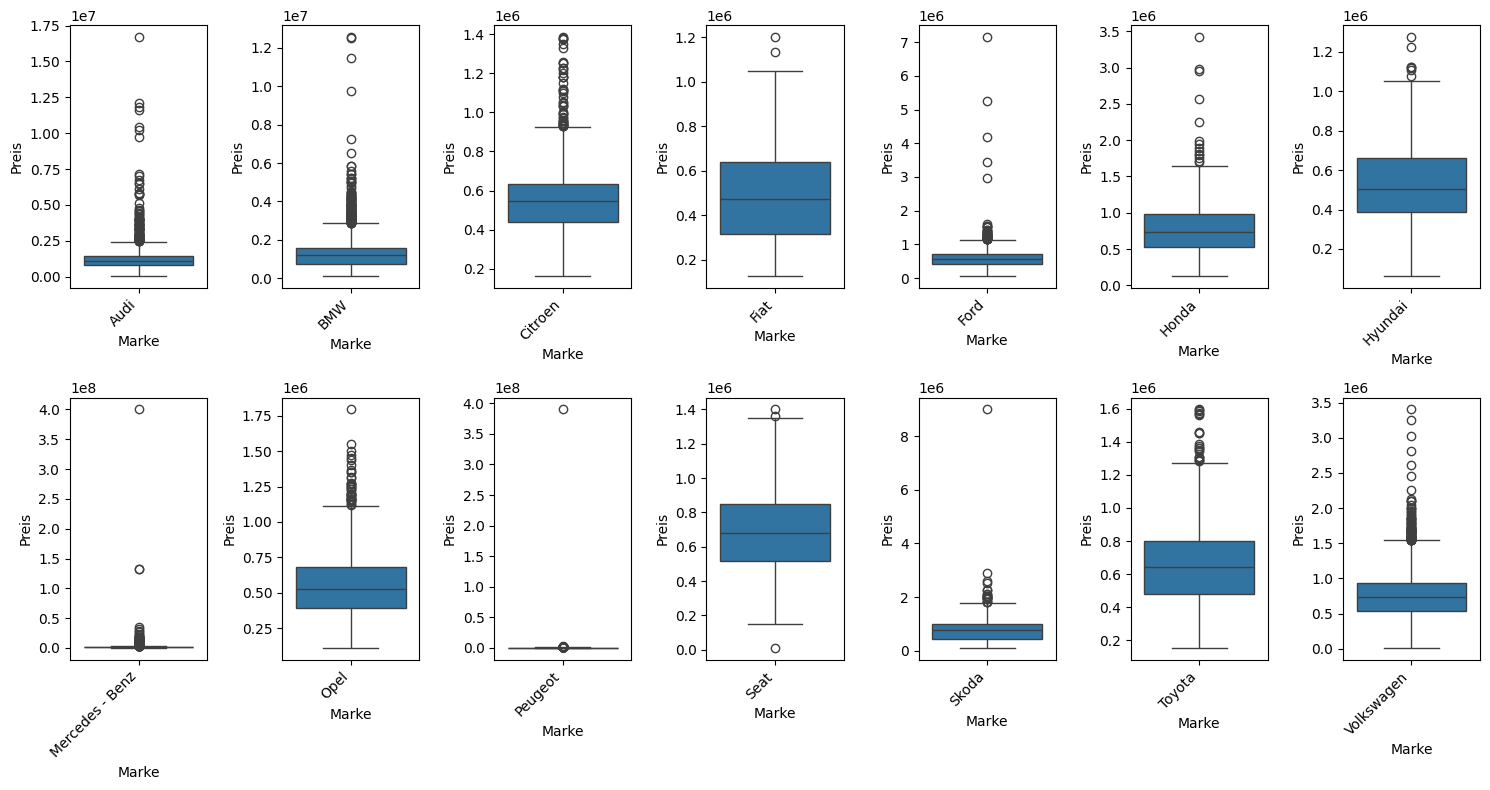

In [90]:
list_marke = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
              'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
              'Volkswagen']

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 8))
axes = axes.flatten()

for i, marke in enumerate(list_marke):
    sns.boxplot(x="Marke", y='Preis', data=df[df['Marke'] == marke], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Die untere Grenze dieser zur Ausreißererkennung verwendeten **IQR-Methode** ist **Q1**, was den Wert an der Position des **ersten Viertels der Daten** darstellt, wenn vom kleinsten zum größten sortiert wird. **Die Obergrenze Q3** stellt das dritte Viertel der Daten dar. Werte, die nicht zwischen dieser Unter- und Obergrenze liegen, gelten als Ausreißer und werden aus dem Datensatz entfernt. Diese Erkennung wurde über die Preisspalte durchgeführt.

Nachdem wir die Ausreißer mit der Interquantilmethode getrennt hatten, visualisierten wir die Ergebnisse erneut mit einem Boxplot, um sie mit der vorherigen Version zu vergleichen. Wie man sehen kann, wurde in den Daten eine große Menge an Ausreißererkennungen vorgenommen und wir erhielten dadurch mehr gleichmäßig verteiltes Fahrzeugportfolio, ohne viele Fahrzeuginformationen zu eliminieren.

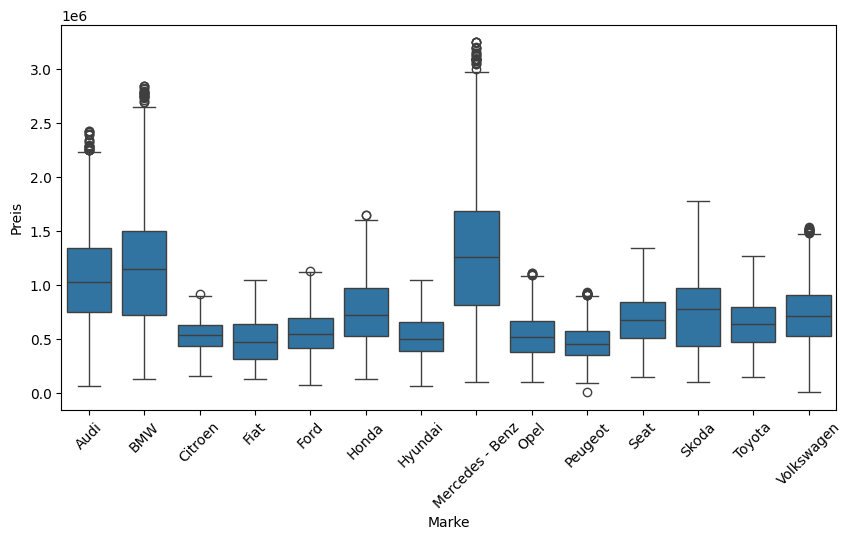

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

list_marke = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

df_ = pd.DataFrame()
for marke in list_marke:
    sub_df = df[df['Marke'] == marke]
    quartile_1 = sub_df['Preis'].quantile(0.25)
    quartile_3 = sub_df['Preis'].quantile(0.75)
    inter_quartile_range = quartile_3 - quartile_1
    threshold = 1.5
    outliers = ((sub_df['Preis'] < (quartile_1 - threshold * inter_quartile_range)) |
                (sub_df['Preis'] > (quartile_3 + threshold * inter_quartile_range)))

    filtered_sub_df = sub_df[~outliers]
    df_ = pd.concat([df_, filtered_sub_df], axis=0)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Marke", y="Preis", data=df_)
plt.xticks(rotation=45)
plt.show()


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Gibt es Fehler im Datensatz?</h2>
</div>
</div>

Vor der Datenbereinigung gab es insgesamt 31078 Zeilen und viele Nullwerte.

Am Anfang des Datenbereinigungsprozesses sterben fehlende Daten, nach Verwendung der isna() Funktion, so aus.

In [96]:
df_.isna().sum()

Marke                                     0
Serie                                     0
Modell                                    0
Kilometer                                 0
Getriebetyp                               0
Kraftstoffart                             0
Karosserieart                             0
Farbe                                     0
Motorhubraum                              0
Motorleistung                             0
Antrieb                                   0
Durchschnittlicher Kraftstoffverbrauch    0
Kraftstofftank                            0
Lackwechsel                               0
Preis                                     0
Alter                                     0
dtype: int64

In [97]:
len(df_)

29022

Am Ende des Datenbereinigungsprozesses blieben insgesamt 29022 Zeilen übrig, aber alle fehlenden Werte wurden behoben. Einige der Lücken wurden direkt gelöscht und einige wurden mit Mittel- und Moduswerten imputiert. Infolgedessen gibt die Funktion isna() für alle Spaltenwerte 0 zurück.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Sind die Daten konsistent?</h2>
</div>
</div>

Da die Anzeigenerstellungsparameter der Internetseite, von der wir die Daten gesammelt haben, den Benutzer nicht an bestimmte feste Regeln hielten, wurden einige Daten ganz anders als üblich eingegeben. Zum Beispiel; Während bei der Motorleistung meist nur Zahlen- und ccm+Zahlenwerte eingetragen wurden, waren auch Werte wie „bis 1200 cm3“ zu sehen. Abgesehen von diesen Syntaxproblemen gab es keine größeren Probleme mit der Konsistenz der Zahlen.

 Im Abschnitt „Ausreißererkennung“ deckten unsere Grenzwerte zwar keinen relativ großen Bereich ab, eine kleine Anzahl von Daten wurde jedoch eliminiert.

  Insgesamt leistete die Seite jedoch gute Dienste bei der Datenbereitstellung und erleichterte uns die Verarbeitung dieser Daten.

In [98]:
df_

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
1,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
2,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
3,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
4,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
5,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,Volkswagen,Polo,1.4 Trendline,159000,Düz,Dizel,Hatchback/3,Beyaz,1422,75.0,Önden Çekiş,5.6,52.7,6 boyalı,629950,9.0
29193,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
28821,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29198,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


In [100]:
df_["Marke"].value_counts()

Marke
Hyundai            2423
Fiat               2409
Ford               2395
Honda              2373
Opel               2373
Toyota             2370
Volkswagen         2328
Peugeot            2292
BMW                2228
Mercedes - Benz    1762
Citroen            1751
Skoda              1560
Seat               1403
Audi               1355
Name: count, dtype: int64

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Besonderheiten sind Ihnen aufgefallen?</h2>
</div>
</div>

Im Abschnitt „Lackwechsel“ gibt es eine große Vielfalt, und da wir im Abschnitt „Modellierung“ eine Kodierung benötigen, ist diese Spalte möglicherweise nicht so effektiv bei der Untersuchung der Daten.

 Die Verwendung der in das Alter umgewandelten Jahresinformationen durch Subtraktion vom aktuellen Jahr kann eine wichtigere Rolle bei der Untersuchung der Auswirkungen des Fahrzeugalters auf Kilometer und Preis spielen.

  Da es so viele Serie und Modelltypen gibt, kann es bei der Untersuchung und Interpretation der Daten in den folgenden Schritten sinnvoller sein, die Autos nur nach Marke zu untersuchen, unabhängig von ihren Serie und Modellen.

In [101]:
df_

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
1,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
2,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
3,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
4,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
5,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,Volkswagen,Polo,1.4 Trendline,159000,Düz,Dizel,Hatchback/3,Beyaz,1422,75.0,Önden Çekiş,5.6,52.7,6 boyalı,629950,9.0
29193,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
28821,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29198,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


In [107]:
df_.to_csv("ber_data.csv", index=False)

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Datenexploration, Statistische Analyse und Visualisierung</h1>
</div>
</div>

<div>
    <p>In diesem Teil haben wir Datenexploration, statistische Analyse und Visualisierung über die gesammelten Daten geführt. Dafür haben wir pandas, matplotlib.pylot, numpy und seaborn Bibliotheken benutzt. </p>
</div>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [115]:
df = pd.read_csv("ber_data.csv")
df.rename(columns={"Durchschnittlicher Kraftstoffverbrauch":'Durchschn. Kraftstoffverbrauch'}, inplace=True)
#df.rename(columns = {'Marka':'Marke', 'Seri':'Serie',
                              #'Model':'Modell', 'Yıl':'Jahr','Kilometre':'Kilometer','Vites Tipi':'Getriebetyp','Yakıt Tipi':'Kraftstoffart','Kasa Tipi':'Karosserieart','Renk':'Farbe','Motor Hacmi':'Motorhubraum','Motor Gücü':'Motorleistung','Çekiş':'Antrieb','Ort. Yakıt Tüketimi':'Durchschn. Kraftstoffverbrauch','Yakıt Deposu':'Kraftstofftank','Boya-değişen':'Lackwechsel','Fiyat':'Preis','Yaş':'Alter'}, inplace = True)

In [116]:
df

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschn. Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
0,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
1,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
2,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
3,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
4,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,Volkswagen,Polo,1.4 Trendline,159000,Düz,Dizel,Hatchback/3,Beyaz,1422,75.0,Önden Çekiş,5.6,52.7,6 boyalı,629950,9.0
29018,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
29019,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29020,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Daten erscheinen Ihnen besonders relevant?</h2>
</div>
</div>

<div>
    <p>
<b>Preis:</b>

Der Preis eines Fahrzeugs ist wahrscheinlich eine der zentralen Variablen, insbesondere bei der Preisentwicklungen, Preiseinflussfaktoren oder Preisprognosen.

<b>Alter:</b>

Das Alter der Fahrzeuge könnte relevant sein, um Muster in Bezug auf Preisentwicklung zu identifizieren.

<b>Motorleistung:</b>

Die Motorleistung könnte einen Einfluss auf den Preis haben. Fahrzeuge mit leistungsstarken Motoren könnten tendenziell höhere Preise haben.

<b>Durchschnittlicher Kraftstoffverbrauch:</b>

Durchschnittlicher Kraftstoffverbrauch kann für umweltbewusste Käufer oder für die Analyse von Kraftstoffeffizienz und Betriebskosten relevant sein.

</p>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Wie sind die Daten verteilt?</h2>
</div>
</div>

<div>
    <p>Die Daten werden in 16 Spalten geteilt, mit den Typen float, integer und object.
</p>
</div>

In [117]:
#  Wie sind die Daten verteilt?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marke                           29022 non-null  object 
 1   Serie                           29022 non-null  object 
 2   Modell                          29022 non-null  object 
 3   Kilometer                       29022 non-null  int64  
 4   Getriebetyp                     29022 non-null  object 
 5   Kraftstoffart                   29022 non-null  object 
 6   Karosserieart                   29022 non-null  object 
 7   Farbe                           29022 non-null  object 
 8   Motorhubraum                    29022 non-null  int64  
 9   Motorleistung                   29022 non-null  float64
 10  Antrieb                         29022 non-null  object 
 11  Durchschn. Kraftstoffverbrauch  29022 non-null  float64
 12  Kraftstofftank                  

<div>
    <p> Um die numerischen Daten besser zu analysieren, nutzten wir describe() Funktion. Damit können wir statistische Werte wie Durchschnitt, Minimum, Maximum berechnen. Diese statistischen Informationen ermöglichen eine grobe Einschätzung der Verteilung und Charakteristiken der Fahrzeugmerkmale und dienen als Grundlage für weiterführende Datenanalysen und Visualisierungen.
</p>
</div>

In [118]:
df.describe().round(3)

,Kilometer,Motorhubraum,Motorleistung,Durchschn. Kraftstoffverbrauch,Kraftstofftank,Preis,Alter
count,29022.000,29022.000,29022.000,29022.000,29022.000,29022.000,29022.00
mean,183380.124,1533.798,116.313,5.579,52.534,711440.675,13.34
std,116598.391,263.719,675.622,1.321,8.060,407249.582,7.03
min,62.000,115.000,1.000,2.800,34.000,10000.000,1.00
25%,111353.750,1388.000,90.000,4.500,45.000,440000.000,8.00
50%,175000.000,1560.000,107.000,5.600,50.000,620000.000,12.00
75%,245000.000,1598.000,125.000,6.500,55.000,850000.000,18.00
max,9999999.000,5461.000,115000.000,14.800,100.000,3250000.000,50.00


<div>
    <p> Außerdem haben wir Histogramme genutzt, um die Verteilung der numerischen Daten zu sehen. Die Histogramme ermöglichen eine visuelle Analyse der Datenverteilung und helfen, Muster in den betrachteten Merkmalen zu identifizieren.

</p>
</div>

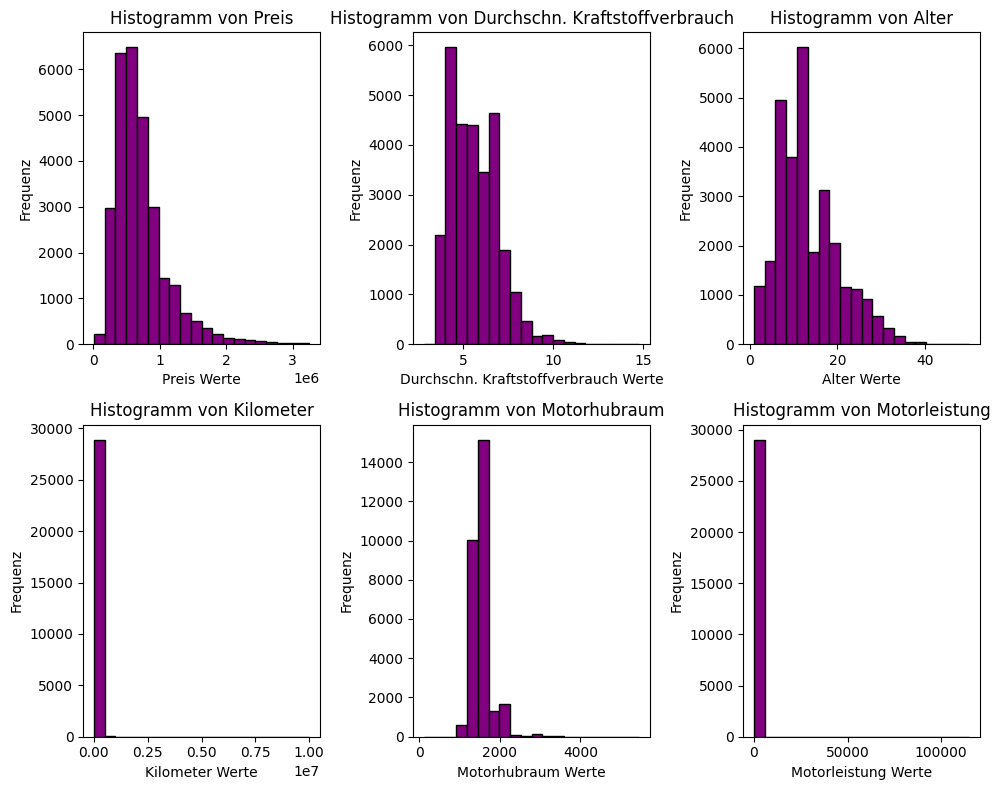

In [119]:
# Definiere die Spalten, für die Histogramme erstellt werden sollen
columns_for_histograms = ['Preis', 'Durchschn. Kraftstoffverbrauch', 'Alter', 'Kilometer',"Motorhubraum","Motorleistung"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

# Flache das Achsen-Array ab, um die Indexierung zu vereinfachen
axes = axes.flatten()

# Iteriere über die ausgewählten Spalten und erstelle Histogramme
for i, column in enumerate(columns_for_histograms):
    hist, bins = np.histogram(df[column], bins=20)
    axes[i].bar(x=bins[:-1], height=hist, width=(bins[1] - bins[0]), align='edge', color='purple', edgecolor='black')
    axes[i].set_xlabel(f'{column} Werte')
    axes[i].set_ylabel('Frequenz')
    axes[i].set_title(f'Histogramm von {column}')

# Passe das Layout an
plt.tight_layout()
plt.show()

<div>
    <p> Um die kategorialen Daten besser zu analysieren, haben wir Barplot verwendet. Dadurch können wir die Verteilung der Fahrzeugmerkmale visualisieren.
</p>
</div>

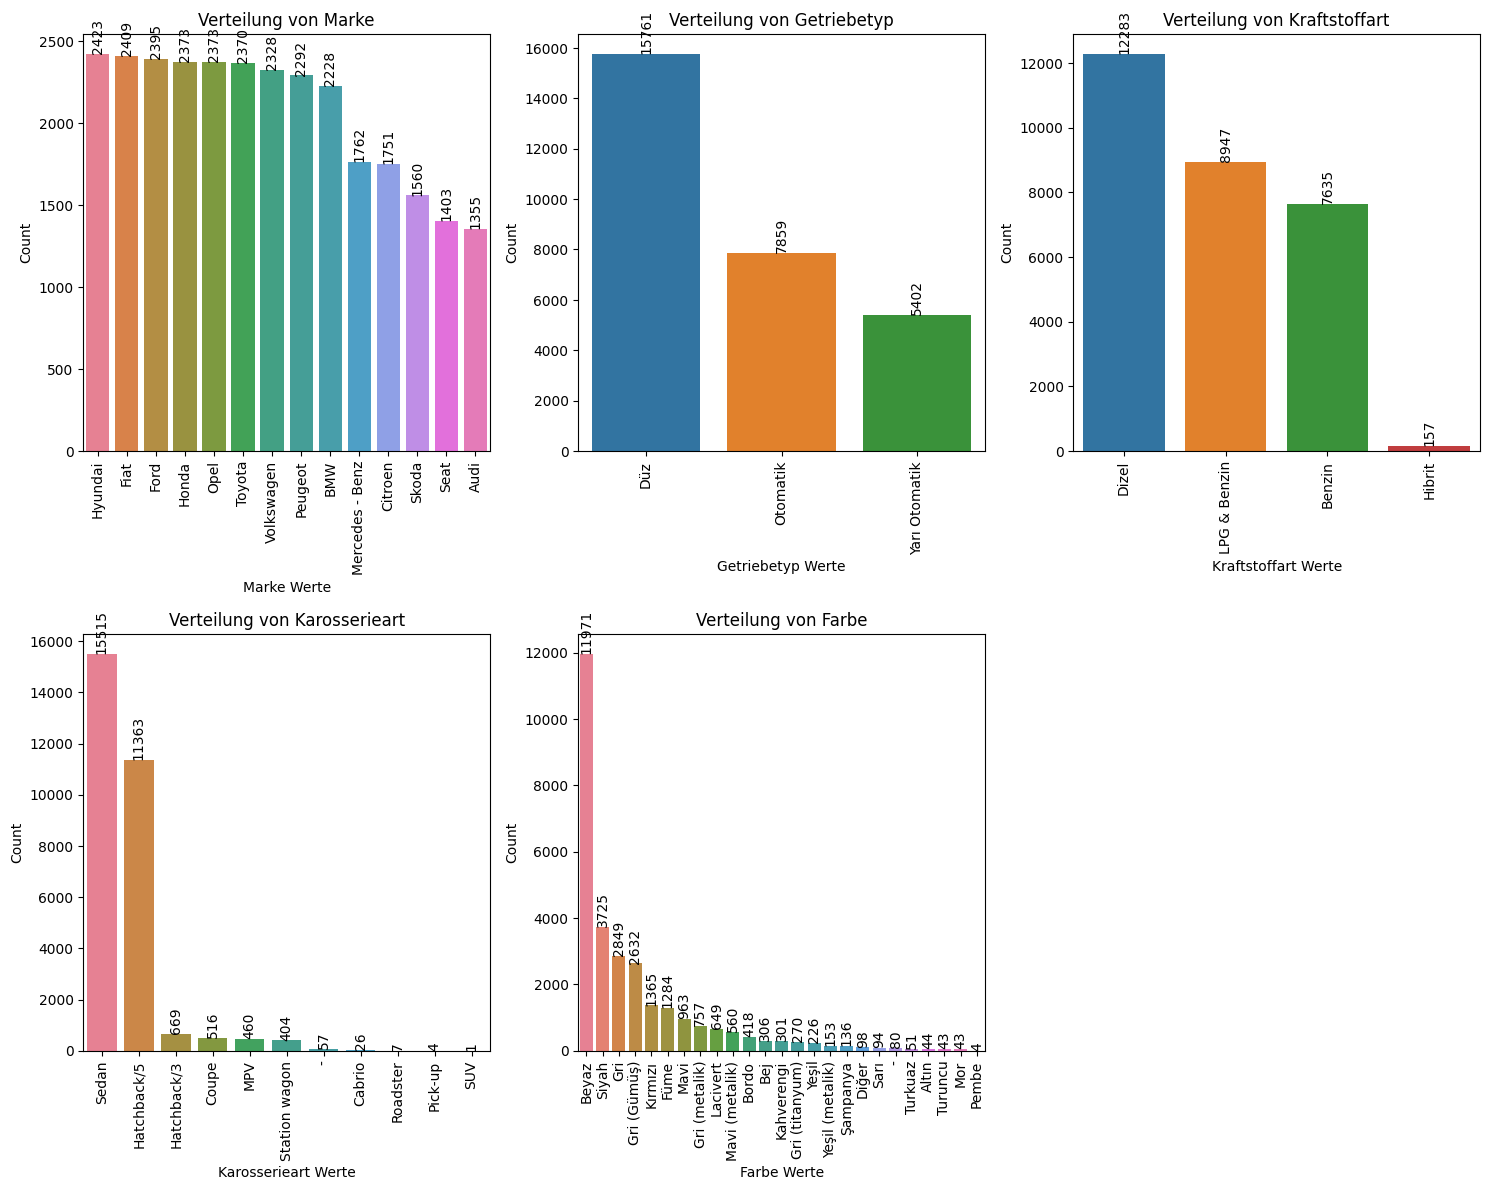

In [120]:
# Definiere die Spalten, für die Diagramme erstellt werden sollen
columns_for_histograms = ['Marke', 'Getriebetyp', 'Kraftstoffart', 'Karosserieart', 'Farbe']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))

# Flache das Achsen-Array ab, um die Indexierung zu vereinfachen
axes = axes.flatten()

# Iteriere über die ausgewählten Spalten und erstelle Diagramme
for i, column in enumerate(columns_for_histograms):
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, ax=axes[i])
    axes[i].set_xlabel(f'{column} Werte')
    axes[i].set_xticks(range(len(value_counts.index)))
    axes[i].set_xticklabels(value_counts.index, rotation=90)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Verteilung von {column}')

    for index, value in enumerate(value_counts):
        axes[i].text(index, value + 0.1, str(value), ha='center', va='bottom',rotation=90)

# Passe das Layout an
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Korrelationen lassen sich erkennen und welche Schlussfolgerungen ziehen Sie daraus?</h2>
</div>
</div>

<div>
    <p>Um Korrelationen zu sehen, haben wir zuerst covariance gerechnet. Aus der Tabelle haben wir die hohen Korrelationen erkannt.

</p>
</div>

In [8]:
df = pd.read_csv("ber_data.csv")

In [9]:
df

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
0,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
1,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
2,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
3,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
4,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,Volkswagen,Polo,1.4 Trendline,159000,Düz,Dizel,Hatchback/3,Beyaz,1422,75.0,Önden Çekiş,5.6,52.7,6 boyalı,629950,9.0
29018,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
29019,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29020,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


In [11]:
#Die numerischen Daten bzw. Merkmalen wurden aus dem DataFrame extrahiert. 
df= df[["Alter",	"Kilometer",	"Durchschnittlicher Kraftstoffverbrauch",	"Motorleistung",	"Motorhubraum",	"Preis"]]
df.rename(columns={"Durchschnittlicher Kraftstoffverbrauch":"Durchschn. Kraftstoffverbrauch"}, inplace=True)

In [14]:
#Welche Korrelationen lassen sich erkennen und welche Schlussfolgerungen ziehen Sie daraus?
# hoher covarianz: Preis- Alter (0.96), Preis - Kilometer (0.99), Durchschn. Kraftstoffverbrauch -Motorhubraum (0.93), Preis- Motorleistung (0.96)
#Alter- Motorhubraum (0.87) , Preis- Motorhubraum (0.96), Durchschn. Kraftstoffverbrauch - Alter(0.78)
numeric_columns = df.select_dtypes(include=[np.number])
covariance = np.abs(numeric_columns.cov())
covariance = (0.5 + 0.5 * (covariance - covariance.min()) / (covariance.max() - covariance.min())).round(2)
print(covariance)

                                Alter  Kilometer  \
Alter                            0.50        0.5   
Kilometer                        0.63        0.9   
Durchschn. Kraftstoffverbrauch   0.50        0.5   
Motorleistung                    0.50        0.5   
Motorhubraum                     0.50        0.5   
Preis                            1.00        1.0   

                                Durchschn. Kraftstoffverbrauch  Motorleistung  \
Alter                                                     0.50           0.50   
Kilometer                                                 0.72           0.50   
Durchschn. Kraftstoffverbrauch                            0.50           0.50   
Motorleistung                                             0.50           0.52   
Motorhubraum                                              0.50           0.50   
Preis                                                     1.00           1.00   

                                Motorhubraum  Preis  
Alter        

<div>
    <p>Wir haben den covariance matrix in einer Pairplot visualisert. In diesem Pairplots, war es einfacher Korellationen zu sehen und zu erkennen.
</p>
</divv

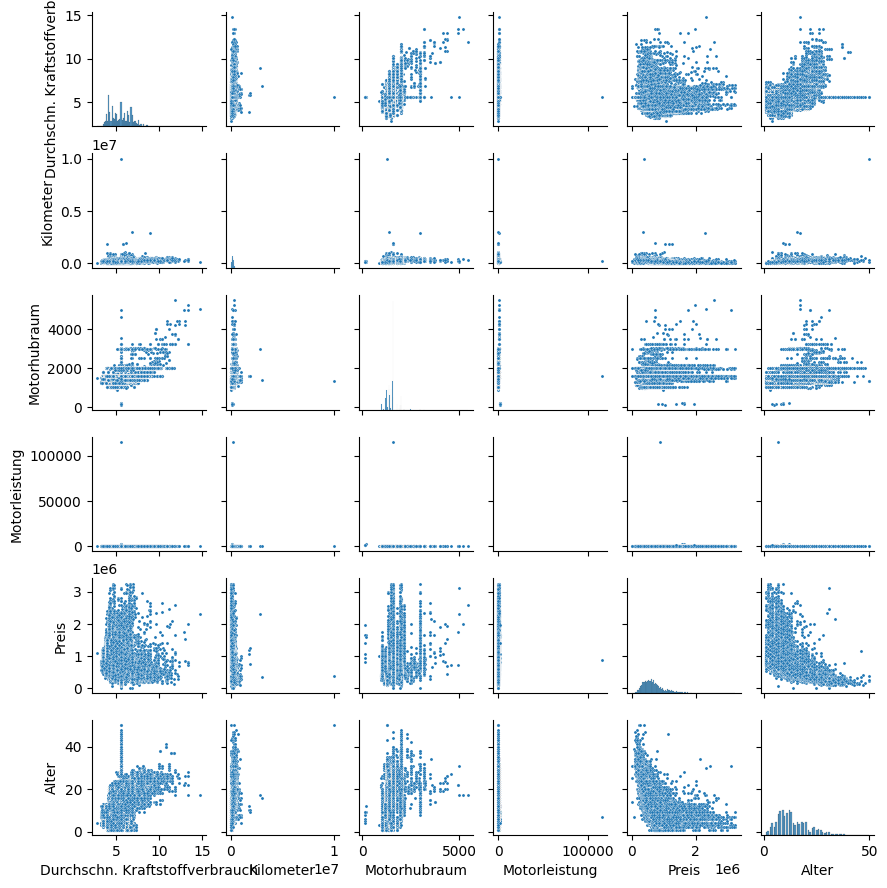

In [15]:
# Kovarianzmatrix kopieren
covariance_matrix = covariance.copy()
# Diagonalelemente der Kopie auf 0 setzen
np.fill_diagonal(covariance_matrix.values, 0)
# Positionen finden, an denen die Kovarianz größer als 0.85 ist
covariance_matrix = np.where(covariance_matrix > 0.85)
# Features mit hoher Kovarianz extrahieren
covariance_features = list(set([df.columns[i] for a in covariance_matrix for i in a]))
# DataFrame mit den ausgewählten Features erstellen
df_covariance = df[covariance_features]
# Pairplot-Diagramm für die ausgewählten Features erstellen
sns.pairplot(df_covariance, height=1.5, plot_kws={'s': 5})

<div>
    <p>Außerdem haben wir mit der Funktion corr. Korrelation zwischen Merkmalen berechnet. Auf diese Weise konnten wir die Richtung der Korrelationen erkennen.
        
Hohe Korrelationen: Preis - Alter (0.60), Kilometer -Alter (0.56), Durchschnittlicher Kraftstoffverbrauch - Alter(0.47), Preis - Kilometer(0.36)
</p>
</div>

In [275]:
# hoher corr: Preis - Alter (0.60), Kilometer -Alter (0.56), Durchschnittlicher Kraftstoffverbrauch - Alter(0.47), Preis - Kilometer(0.36),Durchschnittlicher Kraftstoffverbrauch -Motorhubraum (0.35)
numeric_columns = df.select_dtypes(include=[np.number])
mat = numeric_columns.corr().round(2)
mat

,Alter,Kilometer,Durchschn. Krafstoffverbrauch,Motorleistung,Motorhubraum,Preis
Alter,1.00,0.56,0.47,-0.01,0.22,-0.60
Kilometer,0.56,1.00,0.22,-0.00,0.25,-0.36
Durchschn. Krafstoffverbrauch,0.47,0.22,1.00,0.01,0.35,-0.14
Motorleistung,-0.01,-0.00,0.01,1.00,0.03,0.03
Motorhubraum,0.22,0.25,0.35,0.03,1.00,0.24
Preis,-0.60,-0.36,-0.14,0.03,0.24,1.00


<div>
    <p>Wir haben diese Korellation Berechnung auch in einer Heatmap visualisiert. Mithilfe diesem Heatmap könnten wir mögliche Relationen und Korrelationen genauer sehen.

</p>
</div>

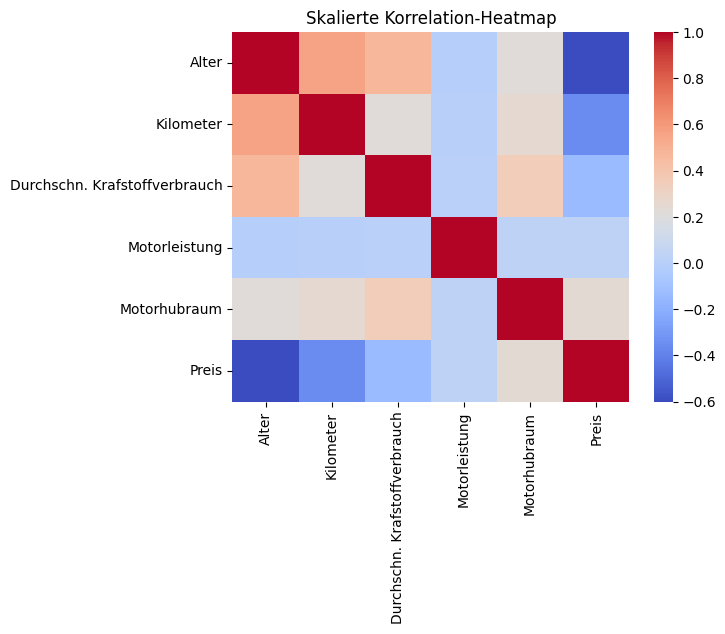

In [276]:
# Die Heatmap plotten
plt.figure()
sns.heatmap(mat, cmap='coolwarm')
plt.title('Skalierte Korrelation-Heatmap')
plt.show()

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)</h2>
</div>
</div>

<div>
    <p>
        Wir haben ein neues Feature namens 'Kraftstoffeffizienz' erstellt, welches das Verhältnis des durchschnittlichen Kraftstoffverbrauchs zur Motorhubraum berechnet und auf drei Dezimalstellen gerundet. Dieses neue Feature bietet einen zusätzlichen Einblick in die Kraftstoffeffizienz pro Motorhubraum. Bei unseren Analyse stellten wir jedoch fest, dass diese beiden Werte (Durchschn. Kraftstoffverbrauch, Motorhubraum) getrennt voneinander bessere Ergebnisse lieferten. Deshalb wird diese Feauture

Ein anderes Feature ist Alter. Am Anfang hatten wir Jahr des Fahrzeugs als eine Spalte. Um das verständlicher zu machen und eine einfachere Rechnung zu ermöglichen haben wir das ins Alter geändert, indem wir vom aktuellen Jahr das subtrahieren. Das ist eine Funktion, die sich ständig aktualisiert. Wir haben das schon im Teil „Bereinigung“ implementiert.
 </p>
</div>

In [277]:
df

,Alter,Kilometer,Durchschn. Kraftstoffverbrauch,Motorleistung,Motorhubraum,Preis
0,15.0,337000,5.8,136.0,1968,749000
1,9.0,145000,4.4,190.0,1968,1975000
2,7.0,76000,4.5,116.0,999,1145000
3,8.0,139000,3.7,110.0,1598,995000
4,5.0,83400,4.4,116.0,999,1250000
...,...,...,...,...,...,...
29017,9.0,159000,5.6,75.0,1422,629950
29018,12.0,183000,4.7,119.1,1598,725000
29019,12.0,221000,5.6,119.1,1601,610000
29020,12.0,199500,5.6,119.1,1400,890000


In [278]:
#Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)
df['Kraftstoffeffizienz'] = (df['Durchschn. Kraftstoffverbrauch'] / df['Motorhubraum']).round(3)

print(df[['Durchschn. Kraftstoffverbrauch', 'Motorleistung', 'Kraftstoffeffizienz', 'Alter']])

#current_year = datetime.now().year
#df["Alter"] = current_year - df["Jahr"]
#df.drop("Jahr", axis=1,inplace=True)

df.to_csv("featured_data.csv", index=False)

       Durchschn. Kraftstoffverbrauch  Motorleistung  Kraftstoffeffizienz  \
0                                 5.8          136.0                0.003   
1                                 4.4          190.0                0.002   
2                                 4.5          116.0                0.005   
3                                 3.7          110.0                0.002   
4                                 4.4          116.0                0.004   
...                               ...            ...                  ...   
29017                             5.6           75.0                0.004   
29018                             4.7          119.1                0.003   
29019                             5.6          119.1                0.003   
29020                             5.6          119.1                0.004   
29021                             5.6          119.1                0.004   

       Alter  
0       15.0  
1        9.0  
2        7.0  
3        8.0  


In [279]:
df = pd.read_csv("featured_data.csv")

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche statistischen Werte erscheinen Ihnen besonders relevant, um die Daten zu beschreiben?</h2>
</div>
</div>

<div>
    <p>
        Basierend auf den bisherigen Informationen, insbesondere den Datenstrukturen und den vorgenommenen Analysen, könnten folgende statistische Werte besonders relevant sein, um die Fahrzeugdaten zu beschreiben:

<b>Durchschnitt:</b>

Der Durchschnittswert von numerischen Merkmalen könnte einen Überblick über die zentralen Tendenzen der Daten bieten.

<b>Standardabweichung:</b>
Hohe Standardabweichungen könnten auf signifikante Variationen in den Daten hindeuten. Diesen statistischen Wert haben wir auch in der Korrelationsberechnung verwendet.

<b>Korrelationskoeffizienten:</b>

Die Korrelationskoeffizienten zwischen verschiedenen Merkmalen bieten Einblicke in die linearen Beziehungen zwischen diesen Merkmalen. Besonders relevante Korrelationen könnten wichtige Zusammenhänge in den Daten hervorheben.


</p>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 5px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Art der Visualisierung wird eingesetzt und wieso?
       Welche Muster oder Trends lassen sich in den Daten erkennen?</h2>
</div>
</div>

<div>
    <p>
Um die Daten und unsere Erkenntnisse über Korrelationen zu visualisieren, haben wir zuerst versucht, das Linien-Diagramm zu nutzen. Obwohl wir mit dieser Methode grobe Tendenz und Muster erkennen können, ist diese Methode nicht geeignet für unseren Datensatz. Denn es gibt sehr viele Daten und es ist nicht möglich, den Verlauf in einem Liniendiagramm zu erkennen. Also war diese Methode nicht nützlich für uns.</p>
</div>

(100, 7)
(100, 7)
(100, 7)
(100, 7)


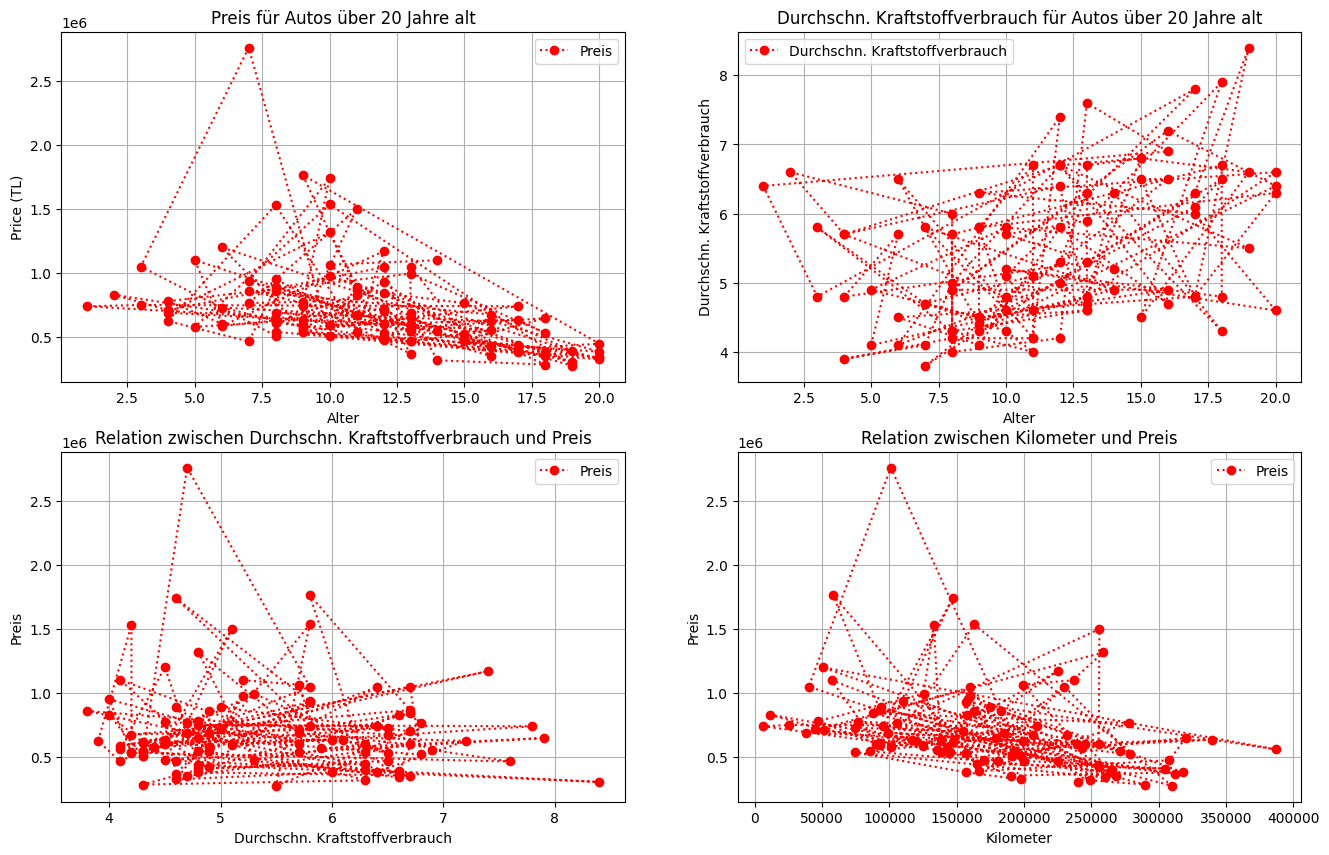

In [280]:
#Welche Art der Visualisierung wird eingesetzt und wieso?
#Welche Muster oder Trends lassen sich in den Daten erkennen?
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
df_slice = df[(df['Alter'] <= 20)]
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Alter'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Preis für Autos über 20 Jahre alt')
plt.xlabel('Alter')
plt.ylabel('Price (TL)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
df_slice = df[(df['Alter'] <= 20)]
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Alter'], df_sample['Durchschn. Kraftstoffverbrauch'], linestyle=':', color='red', marker='o', label='Durchschn. Kraftstoffverbrauch')
plt.title('Durchschn. Kraftstoffverbrauch für Autos über 20 Jahre alt')
plt.xlabel('Alter')
plt.ylabel('Durchschn. Kraftstoffverbrauch')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Durchschn. Kraftstoffverbrauch'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Relation zwischen Durchschn. Kraftstoffverbrauch und Preis')
plt.xlabel('Durchschn. Kraftstoffverbrauch')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
df_sample = df_slice.sample(n=100, random_state=42)
print(df_sample.shape)
plt.plot(df_sample['Kilometer'], df_sample['Preis'], linestyle=':', color='red', marker='o', label='Preis')
plt.title('Relation zwischen Kilometer und Preis')
plt.xlabel('Kilometer')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)
plt.show()


<div>
    <p>Scatter Plots sind nützlich, um die Beziehung zwischen zwei numerischen Variablen zu zeigen. Deshalb haben wir Scatterplot benutzt. Diese Methode war für unsere Daten hinsichtlich der Mengen- und Verteilungsbeobachtung besser geeignet und verständlicher. Wir könnten auch die Tendenz besser erkennen. </p>
</div>

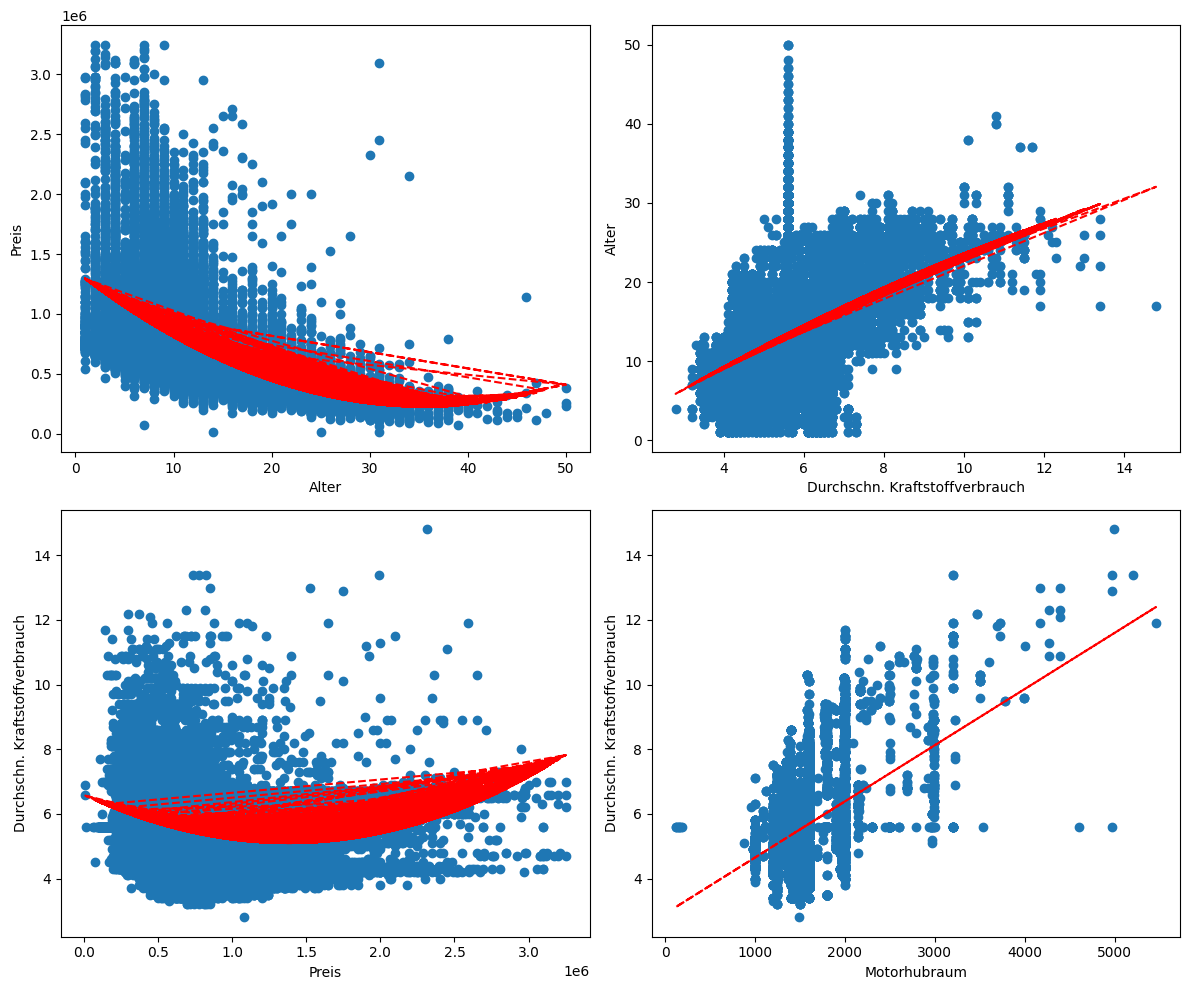

In [294]:
#Welche Art der Visualisierung wird eingesetzt und wieso?
#Welche Muster oder Trends lassen sich in den Daten erkennen?

plt.figure(figsize=(12, 10))

# Oben links
plt.subplot(2, 2, 1)
plt.scatter(df['Alter'], df['Preis'], label='Data')
z = np.polyfit(df['Alter'], df['Preis'], 2)
p = np.poly1d(z)
regression_line = p(df['Alter'])
plt.plot(df['Alter'], regression_line, "r--", label='Quadratic Regression')
plt.ylabel('Preis')
plt.xlabel('Alter')


# Oben rechts
plt.subplot(2, 2, 2)
plt.scatter(df['Durchschn. Kraftstoffverbrauch'], df['Alter'])
z = np.polyfit(df['Durchschn. Kraftstoffverbrauch'], df['Alter'], 2)
p = np.poly1d(z)
regression_line = p(df['Durchschn. Kraftstoffverbrauch'])
plt.plot(df['Durchschn. Kraftstoffverbrauch'], regression_line, "r--", label='Quadratic Regression')
plt.xlabel('Durchschn. Kraftstoffverbrauch')
plt.ylabel('Alter')


# Unten links
plt.subplot(2, 2, 3)
plt.scatter(df['Preis'],df['Durchschn. Kraftstoffverbrauch'])
z = np.polyfit(df['Preis'],df['Durchschn. Kraftstoffverbrauch'], 2)
p = np.poly1d(z)
regression_line = p(df['Preis'])
plt.plot(df['Preis'], regression_line, "r--", label='Quadratic Regression')
plt.ylabel('Durchschn. Kraftstoffverbrauch')
plt.xlabel('Preis')

# Unten rechts
plt.subplot(2, 2, 4)
plt.scatter(df['Motorhubraum'], df['Durchschn. Kraftstoffverbrauch'])
z = np.polyfit(df['Motorhubraum'], df['Durchschn. Kraftstoffverbrauch'], 1)
p = np.poly1d(z)
regression_line = p(df['Motorhubraum'])
plt.plot(df['Motorhubraum'], regression_line, "r--", label='Linear Regression')
plt.xlabel('Motorhubraum')
plt.ylabel('Durchschn. Kraftstoffverbrauch')



# Layout anpassen
plt.tight_layout()

#  Die Plots zeigen
plt.show()

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 5px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche praktischen Implikationen oder Empfehlungen können auf der Grundlage der Erkenntnisse aus den Daten gegeben werden?</h2>
</div>
</div>

<div>
    <p>Aus diesen Ergebnissen identifizieren wir, dass Preise mit durchschnittlichen Kraftstoffverbrauch und Alter eine negative Korrelation hat und der durchschnittliche Kraftstoffverbrauch mit Alter und Motorhubraum eine positive Korrelation hat.  

Mit Hilfe von diesen Erkentnissen können ein Paar Empfehlungen für Verbraucher und für Hersteller gemacht werden.


<b>Für Verbraucher:</b> Verbraucher könnten bei der Auswahl eines Fahrzeugs darauf achten, Modelle mit einem günstigen Kraftstoffverbrauch zu wählen, da dies langfristig zu niedrigeren Betriebskosten führen kann. Ältere Fahrzeuge könnten tendenziell einen höheren Kraftstoffverbrauch aufweisen, daher könnte es sinnvoll sein, beim Kauf eines Gebrauchtwagens auf Modelle mit geringerem Alter und/oder effizienteren Motoren zu setzen.



<b>Für Hersteller:</b> Hersteller könnten verstärkt in die Entwicklung von energieeffizienteren Fahrzeugen investieren, um die Nachfrage nach kraftstoffsparenden Modellen zu befriedigen und wettbewerbsfähig zu bleiben.

</p>
</div>

[link text](https://)<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Wahrscheinlichkeit, Hypothesen, Schlussfolgerung</h1>
</div>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"><b>Wahrscheinlichkeitsrechnung</b></h2>
</div>
</div>

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import seaborn as sns

In [296]:
df = pd.read_csv("ber_data.csv")
#df.rename(columns = {'Marka':'Marke', 'Seri':'Serie',
                              #'Model':'Modell', 'Yıl':'Jahr','Kilometre':'Kilometer','Vites Tipi':'Getriebetyp','Yakıt Tipi':'Kraftstoffart','Kasa Tipi':'Karosserieart','Renk':'Farbe','Motor Hacmi':'Motorhubraum','Motor Gücü':'Motorleistung','Çekiş':'Antrieb','Ort. Yakıt Tüketimi':'Durchschnittlicher Kraftstoffverbrauch','Yakıt Deposu':'Kraftstofftank','Boya-değişen':'Lackwechsel','Fiyat':'Preis','Yaş':'Alter'}, inplace = True)

In [297]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marke                                   29022 non-null  object 
 1   Serie                                   29022 non-null  object 
 2   Modell                                  29022 non-null  object 
 3   Kilometer                               29022 non-null  int64  
 4   Getriebetyp                             29022 non-null  object 
 5   Kraftstoffart                           29022 non-null  object 
 6   Karosserieart                           29022 non-null  object 
 7   Farbe                                   29022 non-null  object 
 8   Motorhubraum                            29022 non-null  int64  
 9   Motorleistung                           29022 non-null  float64
 10  Antrieb                                 29022 non-null  ob

In der Visualisierungsphase können wir uns ein paar vorläufige Vorstellungen über die Wahrscheinlichkeit machen, indem wir uns die Korrelation, die Beziehung zwischen Merkmalen, das Verhalten und die Tendenz der Daten ansehen. Und wir können sie mit verschiedenen Methoden testen. Für unsere Daten und Beispiele können wir jedoch fanden Satz von Bayes passend und führten unsere Wahrscheinlichkeitsberechnungen anhand von zwei Beispielen durch.

In [298]:
df.dtypes

Marke                                      object
Serie                                      object
Modell                                     object
Kilometer                                   int64
Getriebetyp                                object
Kraftstoffart                              object
Karosserieart                              object
Farbe                                      object
Motorhubraum                                int64
Motorleistung                             float64
Antrieb                                    object
Durchschnittlicher Kraftstoffverbrauch    float64
Kraftstofftank                            float64
Lackwechsel                                object
Preis                                       int64
Alter                                     float64
dtype: object

 Wir können es als 'Wahrscheinlichkeit von Fahrzeugen mit einer Motorleistung von **mehr als 110**' **P(A)** bezeichnen. Dies wird das zweite Ergebniss in diesem Szenario sein. Die Wahrscheinlichkeit, dass die Spalte „Motorleistung“ einen Wert größer als 110 hat, beträgt für diesen Datensatz **0,49**.

In [300]:
#Ermittlung der Wahrscheinlichkeit von Fahrzeugen mit einer Motorleistung von mehr als 110
motorleistung_probability = len(df[df['Motorleistung']>=110]) / len(df['Motorleistung'])
print('Probability: ', motorleistung_probability)

Probability:  0.492557370270829


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Was ist die Wahrscheinlichkeit für das Auftreten der Ereignisse?</h2>
</div>
</div>

Wir können das 800.000-TL-Ereignis als P(B) bezeichnen. In diesem Szenario handelt es sich um die ersten Ergebnisse. In diesem Datensatz beträgt die Wahrscheinlichkeit, dass die Daten in der gesamten Preisspalte mehr als 800.000 sind, 0,29.




In [302]:
#Wahrscheinlichkeit eines Fahrzeugs mit einem Preis von mehr als 800.000 TL
price_probability = len(df[df['Preis']>=800000]) / len(df['Preis'])
print('Probability: ', price_probability)

Probability:  0.2943973537316518


In [303]:
#Wir haben eine Kopie des DataFrame genommen und diejenigen
#mit „Motorleistung“ größer als 110 in df_motorleistung eingefügt
df_motorleistung = df.copy()
df_motorleistung = df[df["Motorleistung"]>=110]

In [305]:
df_motorleistung

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
0,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
1,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
2,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
3,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
4,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29016,Volkswagen,Passat,1.6 Trendline,72636,Otomatik,Benzin,Coupe,Beyaz,150,1600.0,Önden Çekiş,5.6,52.7,Belirtilmemiş,1390000,4.0
29018,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
29019,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29020,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Was ist die Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses?</h2>
</div>
</div>

Die Wahrscheinlichkeit, dass die Motorleistung größer als 100 ist, wenn der Preis 800.000 TL beträgt:

* motorleistung_preis_count = P(A∩B)

* df_motorleistung = P(A)
* P(B|A)= P(A∩B) / P(A)

gibt es der Wert der Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses.







In [306]:
#Wir berechnen die Wahrscheinlichkeit,
#dass der "Preis" größer als 800.000 ist, wenn die "Motorleistung" größer als 110 ist.

motorleistung_preis_count = (df_motorleistung['Preis'] >= 800000).sum()
motorleistung_preis_prob = motorleistung_preis_count / len(df_motorleistung)
print('Wahrscheinlichkeit, dass „Preis“ größer als 800.000 ist, wenn „Motorleistung“ größer als 110 ist: ', motorleistung_preis_prob)

Wahrscheinlichkeit, dass „Preis“ größer als 800.000 ist, wenn „Motorleistung“ größer als 110 ist:  0.5168240643581672


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"> Was ist die Wahrscheinlichkeit für das Auftreten des zweiten Ereignisses unter der Bedingung des Auftretens des ersten Ereignisses?</h2>
</div>
</div>

P(A∣B) wird berechnet durch (P(B∣A)⋅P(A)) / P(B) nach **Satz von Bayes**.
Mit anderen Worten: Wir müssen den P(B|A) Wert, der 0,51 beträgt, mit dem P(A) Wert, der **df_motorleistung** ist, multiplizieren und ihn durch den P(B) Wert, der **preis_wahrscheinlichkeit** ist, dividieren. gibt.


In [307]:
#Satz von Bayes
#Dank des Bayes-Theorems berechnen wir unter Verwendung unserer vorherigen Berechnungen einfach die Wahrscheinlichkeit,
#dass „Motorleistung“ mehr als 110 beträgt, wenn „Preis“ mehr als 800.000 beträgt.
preis_motorleistung_prob = (motorleistung_preis_prob * motorleistung_probability ) / price_probability
print('Wahrscheinlichkeit, dass „Motorleistung“ größer als 110 ist, wenn „Preis“ größer als 800.000 ist: ', preis_motorleistung_prob)

Wahrscheinlichkeit, dass „Motorleistung“ größer als 110 ist, wenn „Preis“ größer als 800.000 ist:  0.8647003745318353


In [323]:
#Ermittlung der Wahrscheinlichkeit von Fahrzeugen mit Alter von weniger als 7
p_A = len(df[df['Alter']<=15]) / len(df['Alter'])
print('Probability: ', p_A)

Probability:  0.6719729860106126


In [325]:
#Wahrscheinlichkeit eines Fahrzeugs mit einem Kilometer von mehr als 1000
p_B = len(df[df['Kilometer'] >= 183000]) / len(df['Kilometer'])
print('Probability: ', p_B)

Probability:  0.46964371855833503


In [326]:
df_p_A = df.copy()
df_p_A = df[df["Alter"] <=15]

In [327]:
#Wir berechnen die Wahrscheinlichkeit,
#dass der "Kilometer" größer als 1 ist, wenn das "Alter" kleiner als 7 ist.

p_A_ = (df_p_A['Kilometer'] >= 183000).sum()
p_A_B = p_A_ / len(df_p_A)
print('Wahrscheinlichkeit, dass „Kilometer“ größer als 1 ist, wenn „Alter" kleiner als 7 ist: ', p_A_B)

Wahrscheinlichkeit, dass „Kilometer“ größer als 1 ist, wenn „Alter" kleiner als 7 ist:  0.2897138754999487


In [329]:
#Satz von Bayes
#Dank des Bayes-Theorems berechnen wir unter Verwendung unserer vorherigen Berechnungen einfach die Wahrscheinlichkeit,
#dass „Alter“ weniger als 7 beträgt, wenn „Kilometer“ mehr als 1 beträgt.
p_B_A = (p_A_B * p_A ) /p_B
print('Wahrscheinlichkeit, dass „Kilometer“ größer als 183000 ist, wenn „Alter“ kleier als 15 ist: ', p_B_A)

Wahrscheinlichkeit, dass „Kilometer“ größer als 183000 ist, wenn „Alter“ kleier als 15 ist:  0.4145267791636097


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"><b>Hypothesen</b></h2>
</div>
</div>

Basierend auf den Daten, die wir im Visualisierungsteil über die Beziehungen zwischen ihnen gelernt haben, und auch auf den Zahlen, die wir im Wahrscheinlichkeitsteil berechnet haben, verfügen wir nun über viele Informationen, die wir hypothetisch aufstellen können.
Angesichts all dieser Informationen bestand unser Ziel darin, unsere Nullhypothesen zu bestimmen und ihre Richtigkeit zu testen.
Mit diesen Informationen haben wir zur Arbeitsweise unserer Modelle beigetragen.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Was sind die Nullhypothesen und was sind die alternativen Hypothesen?</h2>
</div>
</div>

**<i>1.Beispiel:</i>**

**H0**: Der Durchschnitt des Motorleistungsdatensatzes zeigt mit 110 keinen statistisch signifikanten Unterschied.

**H1**: Der Durchschnitt des Motorleistungsdatensatzes zeigt mit 110 einen statistisch signifikanten Unterschied.

**<i>2.Beispiel:</i>**

**H0**: Es besteht keine statistische Signifikanz zwischen Preis und Motorleistung.

**H1**: Es besteht eine statistische Signifikanz zwischen Preis und Motorleistung.

**<i>3.Beispiel:</i>**

**H0**: Es gibt keinen statistischen Signifikanzunterschied, da der Durchschnitt der Spalte „Preis“ bei 650.000 liegt.

**H1**: Es besteht ein statistisch signifikanter Unterschied zwischen  der Durchschnitt der Spalte „Preis“ und 650000.


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Hypothesen lassen sich durch einen Hypothesentest verwerfen oder bestätigen?</h2>
</div>
</div>

* <i>1.Beispiel:</i>

Da der t-Wert kritischer t-Wert im Minus- und Plusbereich bleibt, müssen wir die H0-Hypothese akzeptieren.Also, der Durchschnitt des Motorleistungsdatensatzes zeigt mit 110 keinen statistisch signifikanten Unterschied.Wir akzeptrieren H0.

* <i> 2.Beispiel:</i>

Wir lehnen die Nullhypothese ab, da der P-Wert kleiner als der Signifikanzwert von 0,05 ist und wir akzeptieren, dass es einen signifikanten Unterschied im statistischen Verhältnis in den Daten zwischen den beiden Spalten gibt. Wir lehnen die Nullhypothese ab.

* <i> 3. Beispiel:</i>

Als Ergebnis eines Stichproben-T-Tests war der p-Wert höher als die Signifikanz als Ergebnis des Tests der Preis-Spalte mit einem Wert von 650.000, was bedeutet, dass die Nullhypothese akzeptiert werden sollte. Dadurch besteht ein statistischer Signifikanzunterschied, und der Durchschnitt der Spalte „Preis“ liegt bei 650.000.

In [330]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import math

1.Beispiel

Der t-Wert (1,59) ist kleiner als der kritische t-Wert (1,96). Daher lässt sich kein statistisch signifikanter Unterschied feststellen und die Nullhypothese (H0 := 110 μ=110) kann nicht verworfen werden. Das heißt, der Mittelwert des Datensatzes zeigt keinen statistisch signifikanten Unterschied zu 110.

Folglich weist die Aussage „Nicht Ablehnen der Nullhypothese“ darauf hin, dass die Nullhypothese nicht abgelehnt wird und der Datensatz keinen signifikanten Unterschied zu einem gegebenen Wert aufweist.

In [332]:
data = df['Motorleistung']
mu =  110 # Vorgegebene Toleranz
alpha = 0.05  # Signifikanzniveau

# Schritt 1: Durchschnitt und Standardabweichung berechnen
mean = np.mean(data)
std_dev = np.std(data, ddof=1) # Mit 'ddof=1' für N-1 Freiheitsgrade
print(mean, std_dev)

# Schritt 2: t-Wert und Freiheitsgrade berechnen
n = len(data)
t = (mean - mu) / (std_dev / np.sqrt(n))
degrees_of_freedom = n - 1

# Schritt 3: Kritischer t-Wert berechnen
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
# Schritt 4: Entscheidung
if abs(t) > critical_value:
    # Ablehnen der Nullhypothese
    result = f"Ablehnen der Nullhypothese"
else:
    # Nicht Ablehnen der Nullhypothese
    result = f"Nicht Ablehnen der Nullhypothese"

# Schritt 5: Ausgabe der Ergebnisse
print(f"t-Wert: {t}")
print(f"Kritischer t-Wert: {critical_value}")
print(f"Testergebnis: {result}")

116.31271104679209 675.621986234165
t-Wert: 1.591753471025999
Kritischer t-Wert: 1.960045731154245
Testergebnis: Nicht Ablehnen der Nullhypothese


  2.Beispiel

  Independent Two-Sample T-Test


 Wenn zwei unabhängige Stichproben entnommen werden, lautet unsere Nullhypothese, dass es keinen signifikanten Unterschied zwischen den beiden Gruppen gibt und wir akzeptieren, dass sie nahezu die gleichen Informationen für das Training unseres Modells liefern. In diesem Beispiel besteht ein statistisch signifikanter Unterschied zwischen den Spalten Motorhubraum und Kraftstofftank. Dies führt dazu, dass wir meine Nullhypothese als Ergebnis des t-Tests ablehnen.



In [333]:
from scipy.stats import ttest_ind

group1 = df['Preis']
group2 = df['Alter']

t_stat, p_value = ttest_ind(group1, group2)
if p_value < 0.05:
    print("There is a statistically significant difference. The hypothesis was rejected.")
else:
    print("There is no statistically significant difference. Hypothesis accepted.")
print(t_stat)
print(p_value)

There is a statistically significant difference. The hypothesis was rejected.
297.6004402797293
0.0


3.Beispiel

One Sample t-Test

Wenn Sie eine Stichprobe aus der Preisspalte in diesem Datensatz entnehmen, unterscheidet sich der Durchschnitt dieser Stichprobe nicht wesentlich von 650.000. Wenn der p-Wert kleiner als Signifikanz ist, ist diese Hypothese falsch, aber in diesem Beispiel wurde nachgewiesen, dass der Mittelwert der Spalte „Preis“ mit 650.000 statistisch nicht signifikant ist, da der p-Wert größer als 0,05 ist.

In [336]:
# T-Test durchführen
t_statistic, p_value = stats.ttest_1samp(df["Preis"], 650000)

# Ausgabe der Ergebnisse
if p_value < 0.05:
    print("There is a statistically significant difference. The hypothesis was rejected.")
else:
    print("There is no statistically significant difference. Hypothesis accepted.")
print("T-Statistik:", t_statistic)
print("P-Wert:", p_value)

There is a statistically significant difference. The hypothesis was rejected.
T-Statistik: 25.701531324592555
P-Wert: 4.609563556979235e-144


In [341]:
from scipy.stats import ttest_ind

group1 = df['Durchschnittlicher Kraftstoffverbrauch']
group2 = df['Alter']

t_stat, p_value = ttest_ind(group1, group2)
if p_value < 0.05:
    print("There is a statistically significant difference. The hypothesis was rejected.")
else:
    print("There is no statistically significant difference. Hypothesis accepted.")
print(t_stat)
print(p_value)

There is a statistically significant difference. The hypothesis was rejected.
-184.83387042564718
0.0


In [342]:
from scipy.stats import ttest_ind

group1 = df['Preis']
group2 = df['Kilometer']

t_stat, p_value = ttest_ind(group1, group2)
if p_value < 0.05:
    print("There is a statistically significant difference. The hypothesis was rejected.")
else:
    print("There is no statistically significant difference. Hypothesis accepted.")
print(t_stat)
print(p_value)

There is a statistically significant difference. The hypothesis was rejected.
212.36297452539102
0.0


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Was sagen Signifikanzniveau und p-Wert über die Hypothesentests aus?</h2>
</div>
</div>

**Signifikanz** <i>α</i> ist die Fehlerquote, die bei der Durchführung von Hypothesentests akzeptiert wird. Wenn beispielsweise α = 0,05 gewählt wurde, bedeutet dies, dass die Wahrscheinlichkeit, dass der Test fehlschlägt, bei 5 % liegt, wenn die Nullhypothese wahr ist.
Wenn der p-Wert kleiner als α ist, wird die Nullhypothese verworfen und die Ergebnisse werden als „statistisch signifikant“ betrachtet.

Ein kleiner **p-Wert** (normalerweise weniger als 0,05) führt dazu, dass die Nullhypothese abgelehnt und die Alternativhypothese akzeptiert wird. In diesem Fall gelten die Ergebnisse als „statistisch signifikant“.
Ein großer p-Wert zeigt an, dass die Nullhypothese nicht abgelehnt wird und die Daten der Nullhypothese entsprechen.



<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;"><b>Schlussfolgerung</b></h2>
</div>
</div>

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Welche Schlussfolgerungen lassen sich ableiten?</h2>
</div>
</div>

Im Allgemein sind die Werte in den Spalten in sich konsistent und weichen kaum voneinander ab. Dies lässt sich daraus schließen, dass es bei der Entnahme einer Probe aus der Säule keinen statistisch signifikanten Unterschied zwischen dem Mittelwert und dem Durchschnitt gibt. In diesem Datensatz gab es keine zwei separaten Spalten, die keinen statistisch signifikanten Unterschied untereinander aufwiesen. Das bedeutet, dass es unter den derzeit verfügbaren Daten keine zwei separaten Spalten gibt, die uns nahezu die gleichen Informationen über vorhandene Autos liefern. Dadurch soll das System in den Phasen der Datenverarbeitung und des maschinellen Lernens konsistenter und zuverlässiger gemacht werden. Ein wichtiger und beachtenswerter Punkt zur Zeit- und Kosteneffizienz.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Wie aussagekräftig sind die Ergebnisse in welchen Grenzen?</h2>
</div>
</div>

Insbesondere die Ergebnisse des unabhängigen T-Tests bei zwei Stichproben waren bedeutungslos. Meistens wurde der p-Wert als nan oder 0,0 angezeigt. Damit einher gingen einige sehr große T-Werte. Dieser Datensatz weist keine große Ähnlichkeit zwischen seinen Spalten auf und keine Spalte ist ähnlich genug, um eine andere Spalte zu ersetzen.

[link text](https://)<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Encoding und Skalierung</h1>
</div>
</div>

In [344]:
import pandas as pd

In [343]:
df = pd.read_csv("ber_data.csv")

In [346]:
df.to_csv("unskalierten_daten.csv", index=False)

Es ist wichtig, dass kategoriale Daten kodiert werden, damit sie im Modellierungsprozess verwendet werden können. Der Kodierungsprozess wandelt kategoriale Daten in ein numerisches Format um und macht diese Daten für Modelle des maschinellen Lernens verständlich. Und wir haben One-Hot-Kodierung verwendet, um unsere kategorialen Daten zu transformieren, und für jeden Datentyp wurde eine separate Spalte erstellt.

In [347]:
df.columns

Index(['Marke', 'Serie', 'Modell', 'Kilometer', 'Getriebetyp', 'Kraftstoffart',
       'Karosserieart', 'Farbe', 'Motorhubraum', 'Motorleistung', 'Antrieb',
       'Durchschnittlicher Kraftstoffverbrauch', 'Kraftstofftank',
       'Lackwechsel', 'Preis', 'Alter'],
      dtype='object')

 Wir verschlüsseln kategoriale Daten wie „Getriebetyp“, „Kraftstoffart“, Karosserieart“, „Farbe“, „Antrieb“, „Marke“.

In [348]:
x_encoded = df[['Getriebetyp', 'Kraftstoffart',
       'Karosserieart', 'Farbe' ,"Antrieb", "Marke"]]
#x_encoded = Serie', 'Modell', 'Kilometer', 'Getriebetyp', 'Kraftstoffart',
 #      'Karosserieart', 'Farbe', 'Motorhubraum', 'Motorleistung', 'Antrieb

Da für jeden eindeutigen Wert eine Spalte erstellt wird, verwenden wir die Funktion nunique, um die Anzahl der neu erstellten Spalten zu ermitteln und deren Anzahl herauszufinden. Insgesamt wurden aufgrund dieses Prinzips 63 weitere Spalten in unserem Datensatz erstellt.

In [349]:
x_encoded.nunique()

Getriebetyp       3
Kraftstoffart     4
Karosserieart    11
Farbe            25
Antrieb           5
Marke            14
dtype: int64

Damit unsere Modellierung konsistenter auf numerischen Merkmalen funktioniert und da die Referenzbereiche von Spalte zu Spalte stark variieren, müssen wir diese numerischen Daten normalisieren, bevor wir mit der Modellierung beginnen. Mithilfe von minmaxscaler machen wir diese nicht codierten Spalten skalar.

In [350]:
x_not_encoded = df[['Alter', 'Kilometer', 'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung', "Motorhubraum", "Preis"]]

In [351]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
# Normalize the dataset
normalized_data = scaler.fit_transform(x_not_encoded)
x_not_encoded = pd.DataFrame(normalized_data, columns=['Alter', 'Kilometer','Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung', "Motorhubraum", "Preis"])

Wir kodieren die Spalten, die kodiert werden müssen, mit OneHotEncoder und der Funktion get_dummies(), die für jede Spalte eine Spalte erstellt und diesen Datenrahmen mit Nullen und Einsen füllt, basierend auf dem unkodierten Datensatz in den resultierenden Datenrahmen.

In [354]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected columns#
X_encoded = pd.get_dummies(x_encoded)

Als Ergebnis dieser Operationen haben wir zwei separate Datenrahmen, die wir aus dem Hauptdatensatz erhalten haben.
Einer enthält codierte kategoriale Daten, während der andere normalisierte numerische Daten enthält.
Wir kombinieren diese beiden separaten Datenrahmen, um unsere Datenverarbeitung mit der Methode concat() fortzusetzen.

In [357]:
df = pd.concat([X_encoded, x_not_encoded, df["Marke"]], axis=1)

In [358]:
df.to_csv("skalierten_daten.csv", index=False)

[link text](https://)<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h1>Maschinelles Lernen und Modellevaluation</h1>
</div>
</div>

Dieses Teil unseres Berichtes wird aus zwei Teilen bestehen. Nämlich Preisvorhersage und Klassifikation basierend auf die Marke.

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("skalierten_daten.csv")

In [360]:
df_ = pd.read_csv("unskalierten_daten.csv")

In [362]:
df

,Getriebetyp_Düz,Getriebetyp_Otomatik,Getriebetyp_Yarı Otomatik,Kraftstoffart_Benzin,Kraftstoffart_Dizel,Kraftstoffart_Hibrit,Kraftstoffart_LPG & Benzin,Karosserieart_-,Karosserieart_Cabrio,Karosserieart_Coupe,...,Marke_Skoda,Marke_Toyota,Marke_Volkswagen,Alter,Kilometer,Durchschnittlicher Kraftstoffverbrauch,Motorleistung,Motorhubraum,Preis,Marke
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,0.285714,0.033694,0.250000,0.001174,0.346614,0.228086,Audi
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,0.163265,0.014494,0.133333,0.001643,0.346614,0.606481,Audi
2,False,False,True,True,False,False,False,False,False,False,...,False,False,False,0.122449,0.007594,0.141667,0.001000,0.165357,0.350309,Audi
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,0.142857,0.013894,0.075000,0.000948,0.277404,0.304012,Audi
4,False,False,True,True,False,False,False,False,False,False,...,False,False,False,0.081633,0.008334,0.133333,0.001000,0.165357,0.382716,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,True,False,False,False,True,False,False,False,False,False,...,False,False,True,0.163265,0.015894,0.233333,0.000643,0.244482,0.191343,Volkswagen
29018,False,False,True,False,True,False,False,False,False,False,...,False,False,True,0.224490,0.018294,0.158333,0.001027,0.277404,0.220679,Volkswagen
29019,True,False,False,False,True,False,False,False,False,False,...,False,False,True,0.224490,0.022094,0.233333,0.001027,0.277965,0.185185,Volkswagen
29020,False,True,False,False,False,False,True,False,False,False,...,False,False,True,0.224490,0.019944,0.233333,0.001027,0.240367,0.271605,Volkswagen


In [363]:
df_

,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
0,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136.0,Önden Çekiş,5.8,70.0,3 boyalı,749000,15.0
1,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190.0,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,9.0
2,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116.0,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,7.0
3,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110.0,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,8.0
4,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116.0,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,Volkswagen,Polo,1.4 Trendline,159000,Düz,Dizel,Hatchback/3,Beyaz,1422,75.0,Önden Çekiş,5.6,52.7,6 boyalı,629950,9.0
29018,Volkswagen,Golf,1.6 TDi Highline,183000,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,119.1,Önden Çekiş,4.7,55.0,Belirtilmemiş,725000,12.0
29019,Volkswagen,Jetta,1.6 TDi Trendline,221000,Düz,Dizel,Sedan,Gri (Gümüş),1601,119.1,Önden Çekiş,5.6,52.7,"1 değişen, 9 boyalı",610000,12.0
29020,Volkswagen,Passat,1.4 TSi BlueMotion Comfortline,199500,Otomatik,LPG & Benzin,Sedan,Gri (Gümüş),1400,119.1,Önden Çekiş,5.6,52.7,2 boyalı,890000,12.0


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Umkehr Operatiton des Min-Max-Scalers</h2>
</div>
</div>

In [376]:
#Funktion zur Umkehrung des Min-Max-Scaling-Prozesses
def inverse_min_max_scaler(scaled_val):
    #Bestimmung von Maximal- und Minimalwerten aus der Originalspalte
    #'Preis' des Datensatzes 'df_'
    max_val = max(df_['Preis'])
    min_val = min(df_['Preis'])

    #Durchführung der inversen Transformation
    og_val = (scaled_val * (max_val - min_val)) + min_val

    return og_val


Diese Funktion, inverse_min_max_scaler, dient zur Umkehrung des Min-Max-Skalierungsprozesses. Das Min-Max-Skalieren ist eine gängige Methode in der Datenpräparation und wird verwendet, um Werte auf einen festgelegten Wertebereich zu skalieren, normalerweise zwischen 0 und 1.



Die Umkehrung des Min-Max-Skalierungsprozesses ist wichtig, da sie es ermöglicht, skalierte Werte wieder in ihre ursprüngliche Skala zu bringen. Dies kann in verschiedenen Anwendungen nützlich sein, insbesondere wenn man maschinelles Lernen verwendet und die Daten vor der Modellanpassung auf einen bestimmten Bereich skaliert wurden. Durch die Umkehrung können die Vorhersagen des Modells in den ursprünglichen Wertebereich zurücktransformiert werden.

Um diese Funktion zu nutzen, muss lediglich der skalierte Wert (scaled_val) als Argument übergeben werden. Sie gibt dann den ursprünglichen Wert zurück, der vor der Skalierung vorhanden war. Es ist wichtig zu beachten, dass für eine korrekte Umkehrung die gleichen Min- und Max-Werte verwendet werden müssen, die für die ursprüngliche Skalierung verwendet wurde






<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Principle Component Analysis (Hauptkomponentenanalyse)</h2>
</div>
</div>

Der PCA ist ein Verfahren zur Dimensionsreduktion, das in Machine-Learning- und Datenanalyseanwendungen weit verbreitet ist. Indem er die Hauptkomponenten extrahiert, kann PCA dazu verwendet werden, die Dimensionalität der Daten zu verringern, indem weniger relevante Informationen entfernt werden, während die wichtigsten Muster und Informationen beibehalten werden.

Text(0, 0.5, 'Explained Variance')

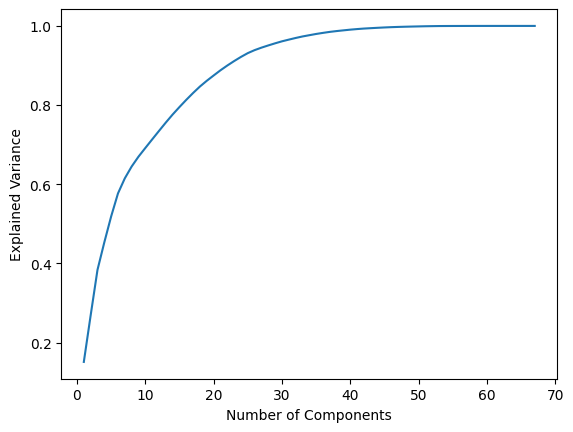

In [377]:
from sklearn.decomposition import PCA

pca = PCA(n_components=67)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Explained Variance')

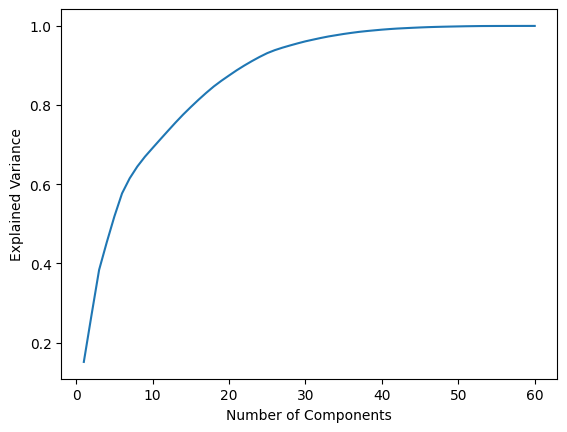

In [378]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Der Code führt PCA mit einer Anzahl von Hauptkomponenten (n_components) durch, die 68 und dann 60 beträgt. Anschließend wird die kumulative erklärte Varianz über die Anzahl der Hauptkomponenten geplottet, um zu zeigen, wie viel Varianz in den Daten von den ersten n Hauptkomponenten erklärt wird.

Die kumulative erklärte Varianz wird normalerweise verwendet, um zu entscheiden, wie viele Hauptkomponenten beibehalten werden sollen. Ein häufiges Kriterium ist es, genügend Hauptkomponenten zu behalten, um einen hohen Prozentsatz der Gesamtvarianz zu erklären, beispielsweise 95 % oder mehr.

Die geplotteten Linien zeigen, wie die kumulative erklärte Varianz mit der Anzahl der Hauptkomponenten steigt. Der Punkt, an dem die Kurve einen "Ellenbogen" bildet, dient als Hinweis darauf, wie viele Hauptkomponenten ausreichen, um einen Großteil der Varianz zu erfassen, ohne zu viele Dimensionen beizubehalten.

In unserem Code wird der PCA zweimal ausgeführt und zwei separate Plots werden erstellt, um die Auswirkungen von 68 und 60 Hauptkomponenten zu vergleichen. Dann wird entshiden das Linear Regression Model mit 60 Komponenten zu tranieren.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Linear Regression</h2>
</div>
</div>

In [385]:
 from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pca = PCA(n_components=57)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
# Daten vorbereiten
data = df.drop("Marke", axis=1) #Entferne die Spalte 'Marka' aus dem Datensatz
X = X #df.drop(['Preis',"Marke"], axis=1)  # Feature-Variablen (unabhängige Variablen)
y = df['Preis']                # Zielvariable (abhängige Variable)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Modell erstellen
linear_reg = LinearRegression()

# Modell trainieren
linear_reg.fit(X_train, y_train)

# Vorhersagen für das Testset treffen
y_pred = linear_reg.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)  # Berechne den Mean Squared Error
r2 = r2_score(y_test, y_pred)            # Berechne den R-squared Score

# Ergebnisse ausgeben
print(f"Root Mean Squared Error (RMSE): {inverse_min_max_scaler(np.sqrt(mse)):.2f}")  # Ausgabe des MSE
print(f"R-squared (R2): {r2:.4f}")            # Ausgabe des R2-Scores

Root Mean Squared Error (RMSE): 202135.91
R-squared (R2): 0.7755


Der Code demonstriert den Prozess des Trainierens eines linearen Regressionsmodells nach Anwendung der Principal Component Analysis (PCA) auf die Daten.

Zunächst wird PCA mit 57 Hauptkomponenten auf den DataFrame df angewendet, um die Feature-Variablen zu transformieren und die Dimensionalität zu reduzieren.

Die Daten werden vorbereitet wo die Spalte 'Marke' aus dem Datensatz entfernt wird, und die abhängige Variable 'Preis' wird als Zielvariable (y) festgelegt.

Die Daten werden in Trainings- und Testsets aufgeteilt. Die unabhängigen Variablen (X) und die Zielvariable (y) werden entsprechend aufgeteilt.

Ein lineares Regressionsmodell wird erstellt (linear_reg = LinearRegression()).

Das Modell wird auf den Trainingsdaten trainiert (linear_reg.fit(X_train, y_train)).

Das trainierte Modell wird verwendet, um Vorhersagen für das Testset zu generieren (y_pred = linear_reg.predict(X_test)).

Das Modell wird anhand der Metriken Root Mean Squared Error (RMSE) und R-squared Score (R2) ausgewertet.

Die Ergebnisse werden ausgegeben wobei der Root Mean Squared Error (RMSE) wird unter Verwendung der Funktion inverse_min_max_scaler auf den Wurzel-MSE angewendet, um den RMSE im ursprünglichen Datenbereich zu erhalten. Außerdem wird der R2-Score ausgegeben.

Es ist wichtig zu beachten, dass die Ausgabe im aktuellen Code zeigt, dass der RMSE 202135.91 und der R2-Score 0.77 beträgt.

Der RMSE von 202135.91 zeigt den Fehler des Modells in der Preisvorhersage an. Der RMSE gibt an, wie stark die Vorhersagen des Modells im Durchschnitt von den tatsächlichen Preisen abweichen. Ein niedrigerer RMSE deutet auf eine bessere Leistung des Modells hin  Dies bedeutet, dass die Vorhersage des Preises in diesem Modell durchschnittlich um 202135.91 türkische Lira abweicht, was kein gutes Ergebnis ist.



Der R2-Score von 0.77 ist ein Maß dafür, wie gut die unabhängigen Variablen die Abhängige erklären. Ein R2-Score von 1 wäre perfekt, während ein Score von 0 oder niedriger darauf hinweist, dass das Modell nicht besser als eine einfache Durchschnittsprognose ist.

In [386]:
columns_to_exclude = ['Alter', 'Kilometer', "Durchschnittlicher Kraftstoffverbrauch", "Motorleistung", "Motorhubraum", "Preis", "Marke"]

columns_not_included = df.columns[~df.columns.isin(columns_to_exclude)]

Da die OLS-Regression nur numpy-arrays für die Variablen akzeptiert, müssen wir sicherstellen, dass die Daten sauber separiert sind, um eine fehlerfreie Konvertierung zu gewährleisten. Kategorische und numerische Daten müssen separat behandelt werden, da die Funktion zur Konvertierung in numpy-arrays eine einheitliche Datenstruktur erwartet.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">OLS lineare Regressionsmodelle Mit Angepassten Parametern</h2>
</div>
</div>

Bevor wir uns für ein komplizierteres Modell entschieden haben, wollten wir feststellen, ob das Problem tatsächlich an der linearen Regression liegt. Aus diesem Grund wurde das OLS-Regressionsmodell traniert. Dieses OLS-Regressionsmodell (Ordinary Least Squares), das eine alternative Minimierungsfunktion namens „Least Squares“ für lineare Regression benutzt,

In [387]:
import statsmodels.api as sm

# Auswahl der unabhängigen Variablen für die X-Matrix
X = np.array(df[['Alter', 'Kilometer', "Durchschnittlicher Kraftstoffverbrauch", "Motorleistung", "Motorhubraum"]])

# Auswahl der restlichen Spalten, die nicht in X enthalten sind

x_ = np.array(df[columns_not_included])

# Verkettung von X und x_ zu einer X-Matrix
X = concatenated_array = np.hstack((X, x_))

# Abhängige Variable (Zielvariable)
y = np.array(df["Preis"])

# Train the linear regression model on the training data
model = sm.OLS(y, X).fit()

# Summary of the trained model
model_summary = model.summary()

# Output the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1717.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:45:48   Log-Likelihood:                 41206.
No. Observations:               29022   AIC:                        -8.229e+04
Df Residuals:                   28960   BIC:                        -8.177e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4599      0.004   -119.471      0.0

Das Modell zeigt einen R-Quadrat-Wert von 0,78 an, was darauf hinweist, dass etwa 78 % der Varianz in der abhängigen Variablen durch das Modell erklärt werden.. Der Grund, warum wir dieses Modell traniert haben, liegt darin, dass wir die Dimensionen weiter reduzieren möchten, die mit PCA reduziert wurden, indem wir die t-Werte und p-Werte analysieren. Das Modell umfasst zahlreiche Prädiktoren (x1 bis x67) mit unterschiedlichen Koeffizienten. Einige Prädiktoren zeigen statistisch signifikante Effekte (mit p-Werten < 0,05), während viele andere nicht signifikant zu sein scheinen (hohe p-Werte). Darüber hinaus gibt es Anomalien wie übermäßig große oder kleine Koeffizienten, die auf Probleme wie numerische Probleme oder Datenanomalien hinweisen können. Durch diese Ergebnisse haben wir festgestellt, dass die Merkmalen „Farbe“ und „Kraftstoffart“ keinen signifikanten Einfluss auf unser Modell haben.

In [388]:
# Importieren der benötigten Bibliotheken
import statsmodels.api as sm
import numpy as np

# Auswahl der kategorialen Features für X ohne "Farbe" und "Kraftstoffart" (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
                 'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3', 'Karosserieart_MPV',
        'Karosserieart_Roadster', 'Karosserieart_SUV', 'Karosserieart_Sedan',
       'Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

pca = PCA(n_components=24)
X = pca.fit_transform(X)
X = np.array(X)

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))

# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])

# Anpassen eines linearen Regressionsmodells mit OLS (Ordinary Least Squares)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Summary of the trained model
model_summary = model.summary()

# Output the model summary
print(model_summary)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R-squared value on test set: {r2}")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              8085.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:46:08   Log-Likelihood:                          27138.
No. Observations:               23217   AIC:                                 -5.422e+04
Df Residuals:                   23188   BIC:                                 -5.398e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Die Ergebnisse der OLS-Regression zeigen, dass das Modell insgesamt eine hohe Leistung aufweist, da das unzentrierte R-Quadrat 0,910 beträgt, was darauf hinweist, dass etwa 91 % der Varianz in der abhängigen Variablen durch die im Modell enthaltenen unabhängigen Variablen erklärt werden.

Das Modell enthält 29 unabhängige Variablen (x1 bis x29), von denen einige signifikante Koeffizienten aufweisen, die einen statistisch bedeutsamen Einfluss auf die abhängige Variable haben. Diese signifikanten Variablen tragen positiv (x1, x2, x3, x4, x9, x10, x12, x15, x16, x18, x19, x20, x27, x29) oder negativ (x7, x8, x11, x13, x14, x17, x22, x23, x24, x25, x26) zur abhängigen Variablen be

Zusätzlich wurde das Modell anhand von Testdaten validiert, wobei der R-Quadrat-Wert auf diesem Testset bei 0,64 liegt. Dies zeigt die Leistung des Modells auf neuen, nicht trainierten Daten und deutet darauf hin, dass etwa 64 % der Varianz in der abhängigen Variablen durch das Modell erklärt werden können.
Das heißt, obwohl fast all der Variablen einen signifikanten Einfluss auf das Modell hat und das Modell auf dem Trainingdatensatz eine hohe Performance zeigt, waren die Ergebnisse bei dem Testdatensatz enttäuschend. Daher wurde beschlossen, ein komplexeres Modell zu entwickeln.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Multi Layer Perzeptron</h2>
</div>
</div>

Das folgende Modell nutzt TensorFlow und Keras, um ein neuronales Netzwerkmodell bzw. ein Mul-Layer-Perzeptron zu erstellen und zu trainieren. Es nimmt sowohl kategorische als auch numerische Features als Eingabevariablen (X) und die Zielvariable (y) an. Dann teilt es die Daten in Trainings- und Testsets auf und erstellt ein sequentielles Modell.

Das Modell besteht aus einem Input-Layer mit Neuronen entsprechend der Anzahl der Eingabemerkmale, gefolgt von einem Hidden Layer mit 100 Neuronen und einer 'relu'-Aktivierungsfunktion. Danach kommt ein Hidden Layer mit 50 Neuronen und einer 'sigmoid'-Aktivierungsfunktion. Schließlich wird ein Output-Layer mit einem Neuronen für die Regression erstellt.

Es wird der Adam-Optimizer verwendet, der auf den Mean Squared Error (MSE) als Verlustfunktion angewendet wird. Das Modell wird dann für 2000 Epochen und eine Batchgröße von 256 trainiert, wobei das Trainings- und Testset verwendet wird. Dann wurde es beschlossen, für 1000 Epochen und eine Batchgröße von 100 zu tranieren, da diese Hyperparametern bessere Resultate ergeben. Schließlich werden Vorhersagen für die Trainings- und Testdaten durchgeführt.

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [445]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# Auswahl der kategorialen Features für x_ (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV', 'Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))


# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

model_non_pca = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model_non_pca.add(Dense(x_train.shape[1]))

#Verstecktes Layer
model_non_pca.add(Dense(100,activation='relu'))

model_non_pca.add(Dense(50,activation='sigmoid'))


#Outputlayer mit einem Neuronen
model_non_pca.add(Dense(1))


model_non_pca.compile(optimizer=Adam(0.001), loss='mse')
#x_train = np.asarray(x_train).astype(np.float)
#y_train = np.asarray(y_train).astype(np.float)

r = model_non_pca.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=100,
              epochs=1000,verbose=0)
yn_train_pred = model_non_pca.predict(x_train)
yn_test_pred = model_non_pca.predict(x_test)

print('Trainingsdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_train, yn_train_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_train, yn_train_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred))))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_test, yn_test_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_test, yn_test_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred))))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

273/273 [==============================] - 0s 2ms/step
Trainingsdaten
RMSE:  94863.80758069016
R2:  0.9569823764930411

Testdaten
RMSE:  116820.6088277591
R2:  0.9296335345023881


Aus diesen Resultaten kann man ergeben dass dieses Model mit einem R-Quadrat Wert von %92 auf die  Trainingsdaten leistet und ein RMSE von 116820 ergibt. Unter Berücksichtigung des aktuellen Automobilmarktes können dieses Ergebnisse als eine gute Resultat betrachtet werden.

Dann, um zu sehen, ob die Dimensionen des Imputspace weiterreduzierbar sind, wurde PCA auf die unabhängigen Variablen durchgeführt.

In [449]:
# Auswahl der kategorialen Features für x_ (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV', 'Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))

pca = PCA(n_components=30)
X = pca.fit_transform(X)
# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])

Text(0, 0.5, 'Explained Variance')

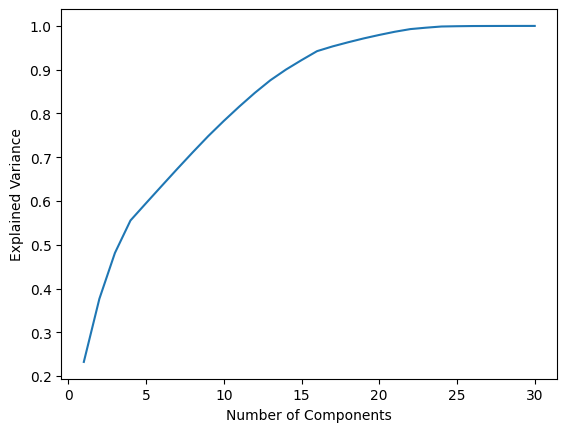

In [450]:
from sklearn.decomposition import PCA

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [451]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(x_train.shape[1]))

#Verstecktes Layer
model.add(Dense(100,activation='relu'))

model.add(Dense(50,activation='sigmoid'))


#Outputlayer mit einem Neuronen
model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')
#x_train = np.asarray(x_train).astype(np.float)
#y_train = np.asarray(y_train).astype(np.float)

r = model.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=100,
              epochs=1000,verbose=0)
yn_train_pred = model.predict(x_train)
yn_test_pred = model.predict(x_test)

print('Trainingsdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_train, yn_train_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_train, yn_train_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred))))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_test, yn_test_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_test, yn_test_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred))))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

273/273 [==============================] - 0s 2ms/step
Trainingsdaten
RMSE:  89276.75763934616
R2:  0.9620876863486035

Testdaten
RMSE:  118591.9436688877
R2:  0.9289706696160711


Obwohl sich die Ergebnisse verbessert haben, nachdem die PCA auf die unabhängigen Variblen angewendet wurde, gab es keinen signifikanten Unterschied zwischen den Resultaten. Aber es ist auch zu merken, dass die Resultate des Modells mit PCA besser sind als das vorherige Modell.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Vorhersage des Preises mit Multi Layer Perzeptron</h2>
</div>
</div>

In [452]:
x_test[200]

array([-7.16657109e-02,  1.16238917e+00, -1.19608063e-01,  3.77030600e-01,
        9.29757372e-02, -6.73436451e-02, -7.89690894e-02, -1.25136506e-01,
       -5.24727355e-01,  5.86934625e-01, -1.24827200e-01, -2.43583966e-02,
       -4.77798036e-02, -7.21210404e-03,  1.90044314e-02, -1.60200079e-01,
        1.07428342e-01,  6.39729106e-02, -2.33833334e-01,  6.06503717e-03,
       -3.37044649e-02, -8.48642424e-02,  3.51242613e-02, -1.97239841e-01,
       -3.81477519e-03, -5.17878342e-03, -1.91424594e-03, -3.11925535e-06,
        5.89100982e-04, -2.30015540e-04])

In [453]:
y_test[200]

0.166358024691358

In [454]:
# Iteration über einen zufälligen Bereich von Testdatenpunkten
for i in range(16, 21):
    #Umformen des einzelnen Datenpunkts für die Vorhersage in die erwartete Form
    single_data_point = x_test[i].reshape(1, -1)

    #Vorhersage mit dem Modell für den einzelnen Datenpunkt
    prediction = model.predict(single_data_point)

    #Ausgabe der abgeschätzten und eigentlichen Ergebnisse durch inverse Transformation
    print("Abgeschätzte Resultat von Model mit PCA:", inverse_min_max_scaler(prediction[0][0]))
    print("Eigentliche Resultat:", int(inverse_min_max_scaler(y_test[i]).round()))

1/1 [==============================] - 0s 31ms/step
Abgeschätzte Resultat von Model mit PCA: 592865.5409812927
Eigentliche Resultat: 610000
1/1 [==============================] - 0s 20ms/step
Abgeschätzte Resultat von Model mit PCA: 599218.4334993362
Eigentliche Resultat: 665000
1/1 [==============================] - 0s 19ms/step
Abgeschätzte Resultat von Model mit PCA: 540824.2058753967
Eigentliche Resultat: 535000
1/1 [==============================] - 0s 22ms/step
Abgeschätzte Resultat von Model mit PCA: 888393.304347992
Eigentliche Resultat: 960000
1/1 [==============================] - 0s 23ms/step
Abgeschätzte Resultat von Model mit PCA: 669396.2544202805
Eigentliche Resultat: 698000


<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">KNN Classifier</h2>
</div>
</div>

Accuracy of KNN: 0.77
                 precision    recall  f1-score   support

           Audi       0.76      0.78      0.77       242
            BMW       0.92      0.93      0.92       445
        Citroen       0.66      0.68      0.67       340
           Fiat       0.86      0.85      0.86       475
           Ford       0.69      0.75      0.72       509
          Honda       0.84      0.89      0.86       512
        Hyundai       0.84      0.79      0.81       505
Mercedes - Benz       0.90      0.85      0.88       356
           Opel       0.73      0.75      0.74       464
        Peugeot       0.63      0.66      0.65       425
           Seat       0.65      0.68      0.66       279
          Skoda       0.64      0.62      0.63       311
         Toyota       0.83      0.79      0.81       480
     Volkswagen       0.70      0.61      0.65       462

       accuracy                           0.77      5805
      macro avg       0.76      0.76      0.76      5805
   weig

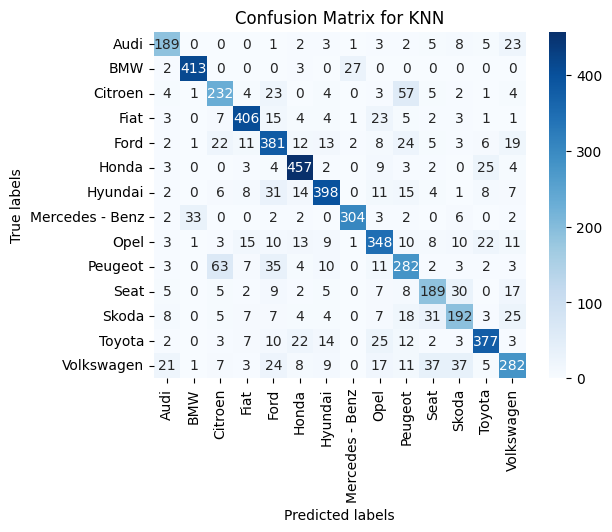

In [455]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Auswahl der Features für X und y
X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell
y = df['Marke']  # Zielvariable

# Initialisierung des KNeighborsClassifier Modells
knn = KNeighborsClassifier(n_neighbors=5)

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Anpassen des KNeighborsClassifier Modells an die Trainingsdaten
knn.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
y_pred = knn.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.2f}")  # Genauigkeit des Modells

# Anzeige eines detaillierten Klassifikationsberichts
print(classification_report(y_test, y_pred))  # Klassifikationsbericht
cm = confusion_matrix(y_test, y_pred)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()

Das K-Neighbors-Classifier-Modell wurde angewendet, um Automarken basierend auf einer Vielzahl von Merkmalen zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine differenzierte Leistung des Modells für verschiedene Automarken. Es konnte bestimmte Marken wie BMW, Fiat und Honda effektiv identifizieren, während es bei anderen Marken wie Seat und Skoda weniger genau war.

Die Gesamtgenauigkeit des Modells beträgt 0,74, mit 10 nachbarn und 0.77 mit 5 nachbarn was auf eine moderate Vorhersageleistung hinweist. Es ist jedoch wichtig zu beachten, dass diese Genauigkeit je nach Automarke variiert. Diese Varierungen könnten durch die Confusion-Matrix beobachtet werden.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Decision Tree Classifier</h2>
</div>
</div>

Accuracy Decision Tree Classifier: 0.93
                 precision    recall  f1-score   support

           Audi       0.88      0.86      0.87       242
            BMW       0.99      0.98      0.99       445
        Citroen       0.85      0.87      0.86       340
           Fiat       0.99      0.98      0.98       475
           Ford       0.97      0.97      0.97       509
          Honda       0.99      0.99      0.99       512
        Hyundai       0.99      0.97      0.98       505
Mercedes - Benz       0.99      0.98      0.98       356
           Opel       0.95      0.97      0.96       464
        Peugeot       0.88      0.88      0.88       425
           Seat       0.81      0.77      0.79       279
          Skoda       0.77      0.83      0.80       311
         Toyota       0.99      0.99      0.99       480
     Volkswagen       0.84      0.85      0.84       462

       accuracy                           0.93      5805
      macro avg       0.92      0.92      0.92

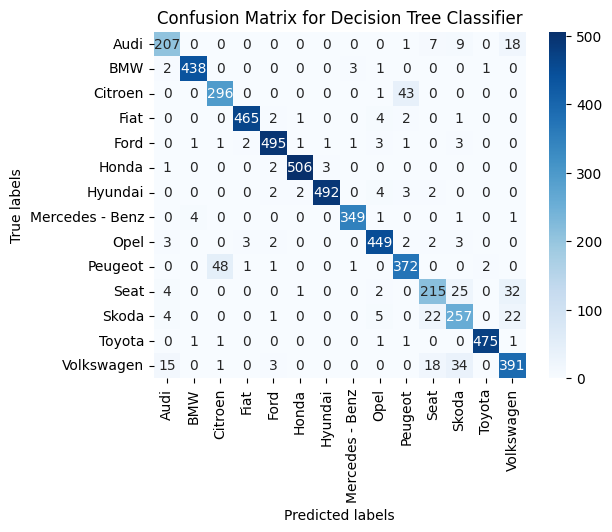

In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell
y = df['Marke']  # Zielvariable
# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des DecisionTreeClassifier Modells
clf = DecisionTreeClassifier(random_state=42)

# Anpassen des DecisionTreeClassifier Modells an die Trainingsdaten
clf.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
y_pred = clf.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Decision Tree Classifier: {accuracy:.2f}")  # Genauigkeit des Modells
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Das Decision Tree Classifier-Modell wurde angewendet, um Automarken basierend auf einer Vielzahl von Merkmalen zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine bemerkenswert gute Leistung des Modells für die meisten Automarken. Besonders hervorzuheben ist die hohe Genauigkeit bei der Vorhersage von BMW, Honda und Toyota.

Die Gesamtgenauigkeit des Modells beträgt hervorragende 0,93, was auf eine sehr präzise Vorhersageleistung hinweist. Die Precision, Recall und F1-Score für die meisten Klassen sind ebenfalls hoch, was darauf hindeutet, dass das Modell die meisten Automarken gut vorhersagen kann.

Diese hohe Genauigkeit und Zuverlässigkeit in der Vorhersage könnten das Decision Tree Classifier-Modell zu einer ausgezeichneten Wahl für die Klassifizierung von Automarken machen. Es könnte jedoch die Lage sein, dass sich das Model überanpasst. Deshalb wird der Random-Forest Klassifizer benutzt um die Überanpassungen zu vermeiden.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Random Forest</h2>
</div>
</div>

Accuracy of Random Forest: 0.94

Classification Report:
                 precision    recall  f1-score   support

           Audi       0.90      0.88      0.89       242
            BMW       1.00      0.99      0.99       445
        Citroen       0.89      0.86      0.87       340
           Fiat       0.99      0.97      0.98       475
           Ford       0.98      0.98      0.98       509
          Honda       0.99      1.00      0.99       512
        Hyundai       0.99      0.98      0.99       505
Mercedes - Benz       0.99      0.98      0.99       356
           Opel       0.93      0.98      0.96       464
        Peugeot       0.88      0.90      0.89       425
           Seat       0.82      0.84      0.83       279
          Skoda       0.88      0.85      0.87       311
         Toyota       0.99      0.99      0.99       480
     Volkswagen       0.86      0.86      0.86       462

       accuracy                           0.94      5805
      macro avg       0.94    

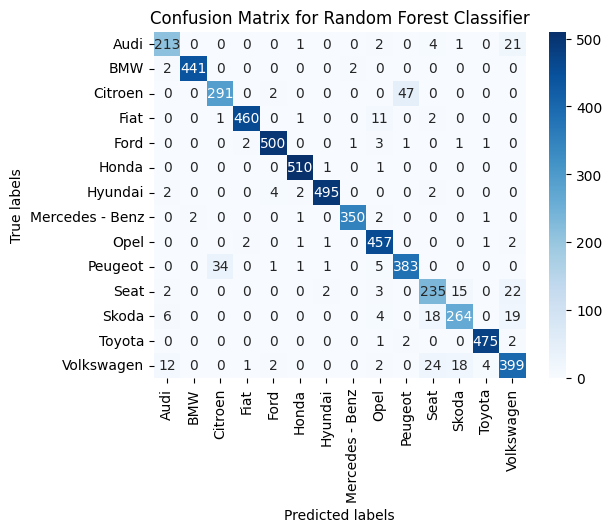

In [460]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
# Auswahl der Features für X und y
X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell

y = df['Marke']  # Zielvariable

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des RandomForestClassifier Modells mit 100 Bäumen
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Anpassen des RandomForestClassifier Modells an die Trainingsdaten
random_forest.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
predictions = random_forest.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Random Forest: {accuracy:.2f}")  # Genauigkeit des Modells

# Ausgabe des Klassifikationsberichts
print("\nClassification Report:")
print(classification_report(y_test, predictions))


cm = confusion_matrix(y_test, predictions)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Das Random Forest-Modell wurde angewendet, um Automarken auf Basis verschiedener Merkmale zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine herausragende Leistung des Modells für die meisten Automarken. Besonders hervorzuheben ist die hohe Genauigkeit bei der Vorhersage von BMW, Honda, Toyota und Hyundai.

Die Gesamtgenauigkeit des Modells beträgt bemerkenswerte 0,90, wenn es nur 5 sub-bäume gibt und 0.93 wenn es 25 sub-bäume gibt. Dann wurde 100 Estimators angewendet. Obwohl die Genauigkeit nicht abnimmt, wenn die Anzahl der Teilbäume 100 überschreitet, wurde keine Verbesserung beobachtet Diese Bewertungen hinweißen auf eine äußerst präzise Vorhersageleistung. Die Precision, Recall und F1-Score für die meisten Klassen sind ebenfalls hoch, was darauf hindeutet, dass das Modell die meisten Automarken sehr gut vorhersagen kann.

Das Random Forest-Modell zeigt eine ähnlich hohe Leistung wie der Decision Tree Classifier, wobei es tendenziell etwas bessere Ergebnisse in Bezug auf Precision, Recall und F1-Score liefert. Es ist eine vielversprechende Wahl für die Klassifizierung von Automarken und könnte aufgrund seiner Präzision und Robustheit eine gute Option für präzise Vorhersagen sein.

<style>
    .gradient-background {
        background: linear-gradient(to right, #b3ffb3, #006600);  /* Light green to dark green gradient, adjust colors as needed */
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="gradient-background">
    <h2 style="font-size: 15px;">Empirischer Vergleich des Random Forest- und Decision Tree-Klassifikators</h2>
</div>
</div>

In [461]:
for i in range(100, 105):
    new_data_point = [X_test.iloc[i]]
    predicted_class = clf.predict(new_data_point)
    predicted_class1 = random_forest.predict(new_data_point)
    actual_class = y_test.iloc[i]
    print("Predicted class label for Decision Tree:", predicted_class)
    print("Predicted class label for Random Forest:", predicted_class1)
    print("Actual class label for: ", actual_class)

Predicted class label for Decision Tree: ['Volkswagen']
Predicted class label for Random Forest: ['Volkswagen']
Actual class label for:  Volkswagen
Predicted class label for Decision Tree: ['Ford']
Predicted class label for Random Forest: ['Ford']
Actual class label for:  Ford
Predicted class label for Decision Tree: ['Skoda']
Predicted class label for Random Forest: ['Opel']
Actual class label for:  Opel
Predicted class label for Decision Tree: ['Volkswagen']
Predicted class label for Random Forest: ['Volkswagen']
Actual class label for:  Volkswagen
Predicted class label for Decision Tree: ['Citroen']
Predicted class label for Random Forest: ['Citroen']
Actual class label for:  Citroen
